<a href="https://colab.research.google.com/github/emilsar/Cedars/blob/main/Project3/1_load_data_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data
If not already done so.

In [3]:
!git clone https://github.com/emilsar/Cedars.git

Cloning into 'Cedars'...
remote: Enumerating objects: 1114, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 1114 (delta 11), reused 4 (delta 0), pack-reused 1088 (from 2)
Receiving objects: 100% (1114/1114), 1.22 GiB | 21.25 MiB/s, done.
Resolving deltas: 100% (388/388), done.
Updating files: 100% (890/890), done.


In [4]:
%cd Cedars/Project3

/content/Cedars/Project3


In [5]:
%ls -al

total 20008
drwxr-xr-x 10 root root    4096 Nov  5 01:09  ./
drwxr-xr-x  6 root root    4096 Nov  5 01:09  ../
-rw-r--r--  1 root root    2100 Nov  5 01:09  0_package_installs.ipynb
-rw-r--r--  1 root root 2856411 Nov  5 01:09  1_load_data_operations.ipynb
-rw-r--r--  1 root root     425 Nov  5 01:09  1_prepdata.py
-rw-r--r--  1 root root  496386 Nov  5 01:09  2_Intensity_Approach.ipynb
-rw-r--r--  1 root root 1691900 Nov  5 01:09  3_Feature_Extraction.ipynb
-rw-r--r--  1 root root 1342789 Nov  5 01:09  4_KMeans_RF.ipynb
-rw-r--r--  1 root root 6554222 Nov  5 01:09  5_DL_image_segmentation.ipynb
drwxr-xr-x  2 root root   12288 Nov  5 01:09  cell_images/
drwxr-xr-x  2 root root    4096 Nov  5 01:09  deprecated/
drwxr-xr-x  2 root root    4096 Nov  5 01:09  DL_result_imgs/
-rw-r--r--  1 root root   11313 Nov  5 01:09  feature_extraction_utils.py
-rw-r--r--  1 root root      34 Nov  5 01:09  final_thresholds.pkl
drwxr-xr-x  4 root root    4096 Nov  5 01:09  imagedata/
drwxr-xr-x  2 root r

In [6]:
! python 1_prepdata.py

# Load libraries

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
from skimage.color import rgb2gray
from skimage.filters import sobel, scharr, apply_hysteresis_threshold, gaussian
from skimage.feature import canny
from skimage.measure import regionprops,regionprops_table
from skimage.morphology import binary_opening, disk, binary_closing, binary_dilation, binary_erosion
from skimage.draw import rectangle_perimeter
from scipy.ndimage import label as scilabel
import cv2
import matplotlib; matplotlib.rcParams['figure.dpi']=300

# Read image and plot

In [ ]:
urothelial_cells=pd.read_pickle("urothelial_cell_toy_data.pkl")
images=np.transpose(urothelial_cells["X"].numpy()*255,(0,2,3,1)).astype(np.uint8)
labels=urothelial_cells["y"]

In [ ]:
img_idx=2
img=images[img_idx]

In [ ]:
# img

In [ ]:
img[:,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(256, 256), dtype=uint8)

In [ ]:
img[128,230,:]

array([ 83, 122, 163], dtype=uint8)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

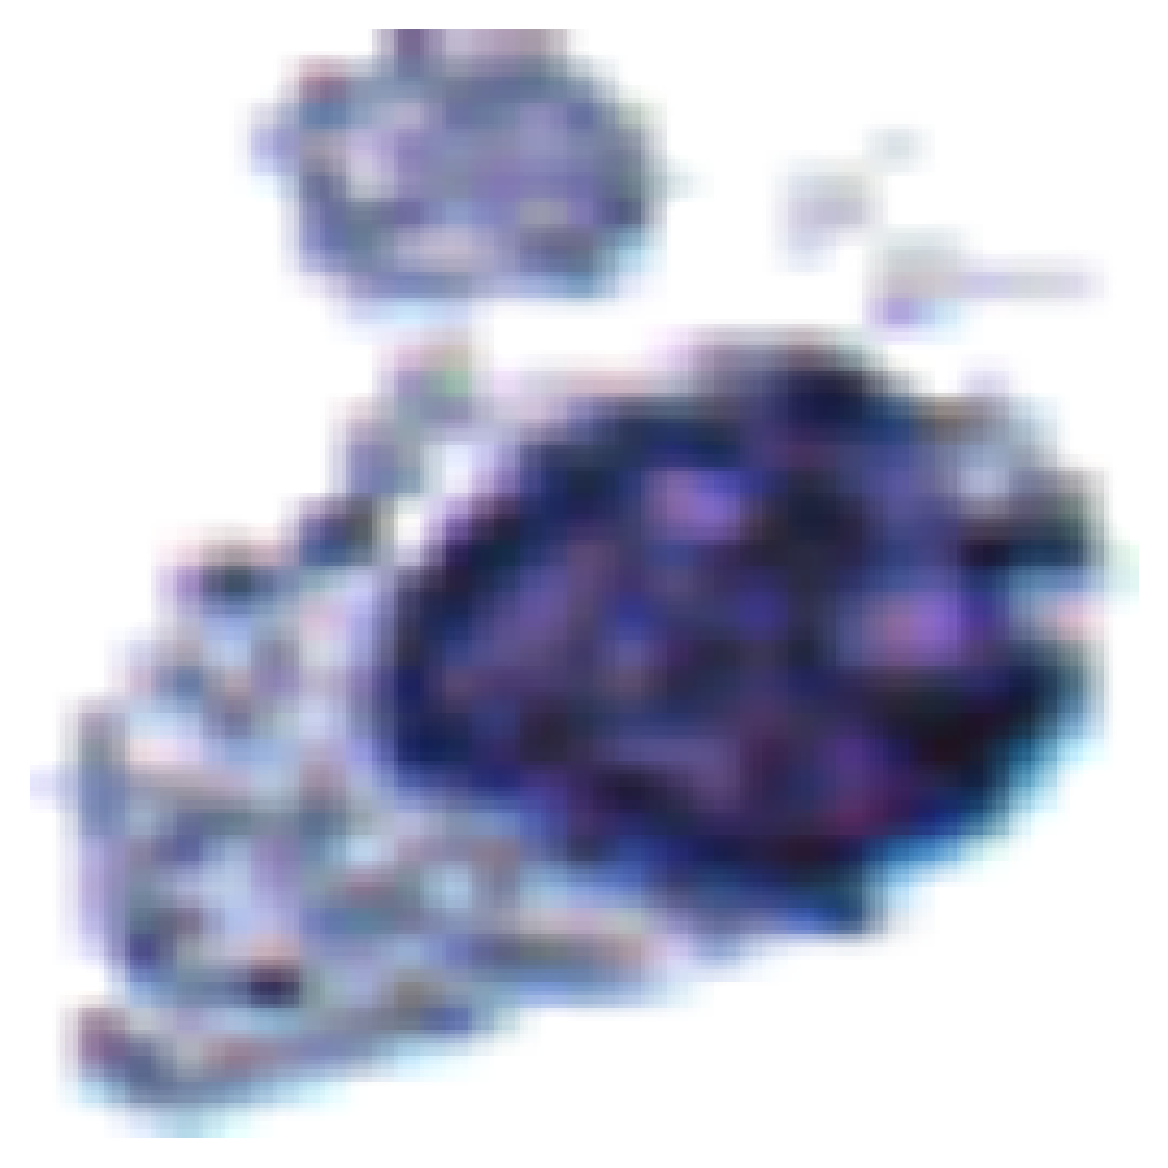

In [ ]:
plt.imshow(img)
plt.axis("off")

# Convert to gray & colors, plot

In [ ]:
img_gray=rgb2gray(img)

In [ ]:
img_gray

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(256, 256))

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

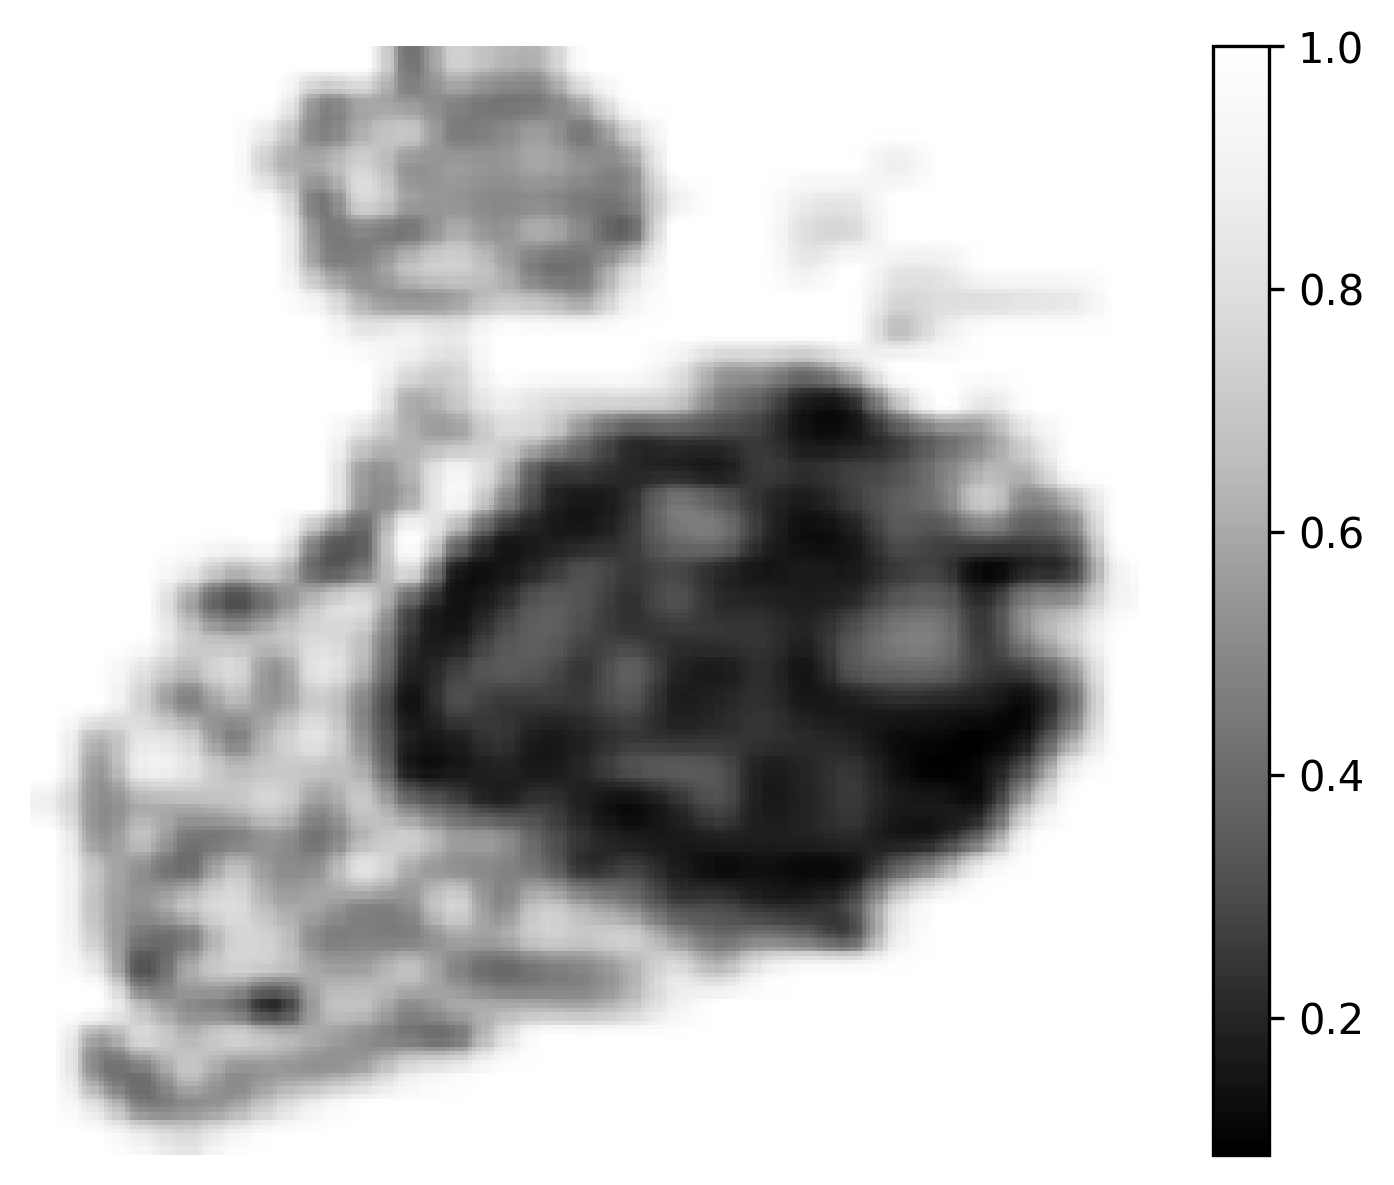

In [ ]:
plt.imshow(img_gray,cmap="Greys_r")
plt.colorbar()
plt.axis("off")

In [ ]:
# x_=range(9)
# y_=1+np.array(list(range(9)))
# plt.scatter(x_,y_)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

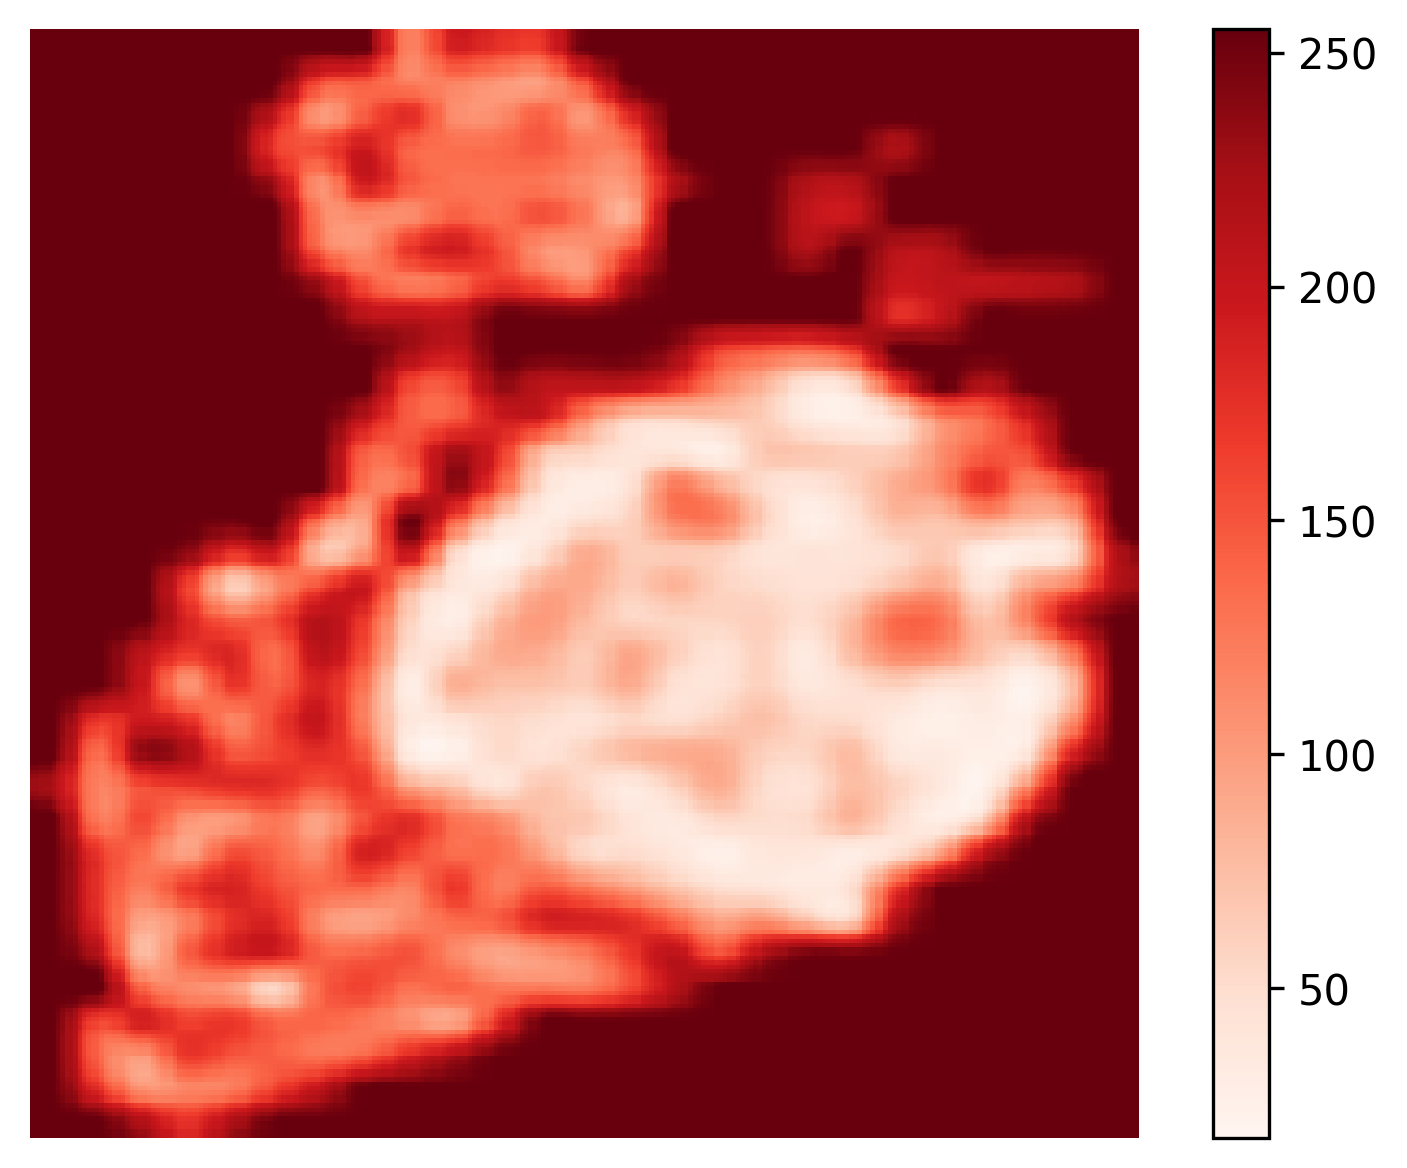

In [ ]:
plt.imshow(img[...,0],cmap="Reds")
plt.colorbar()
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

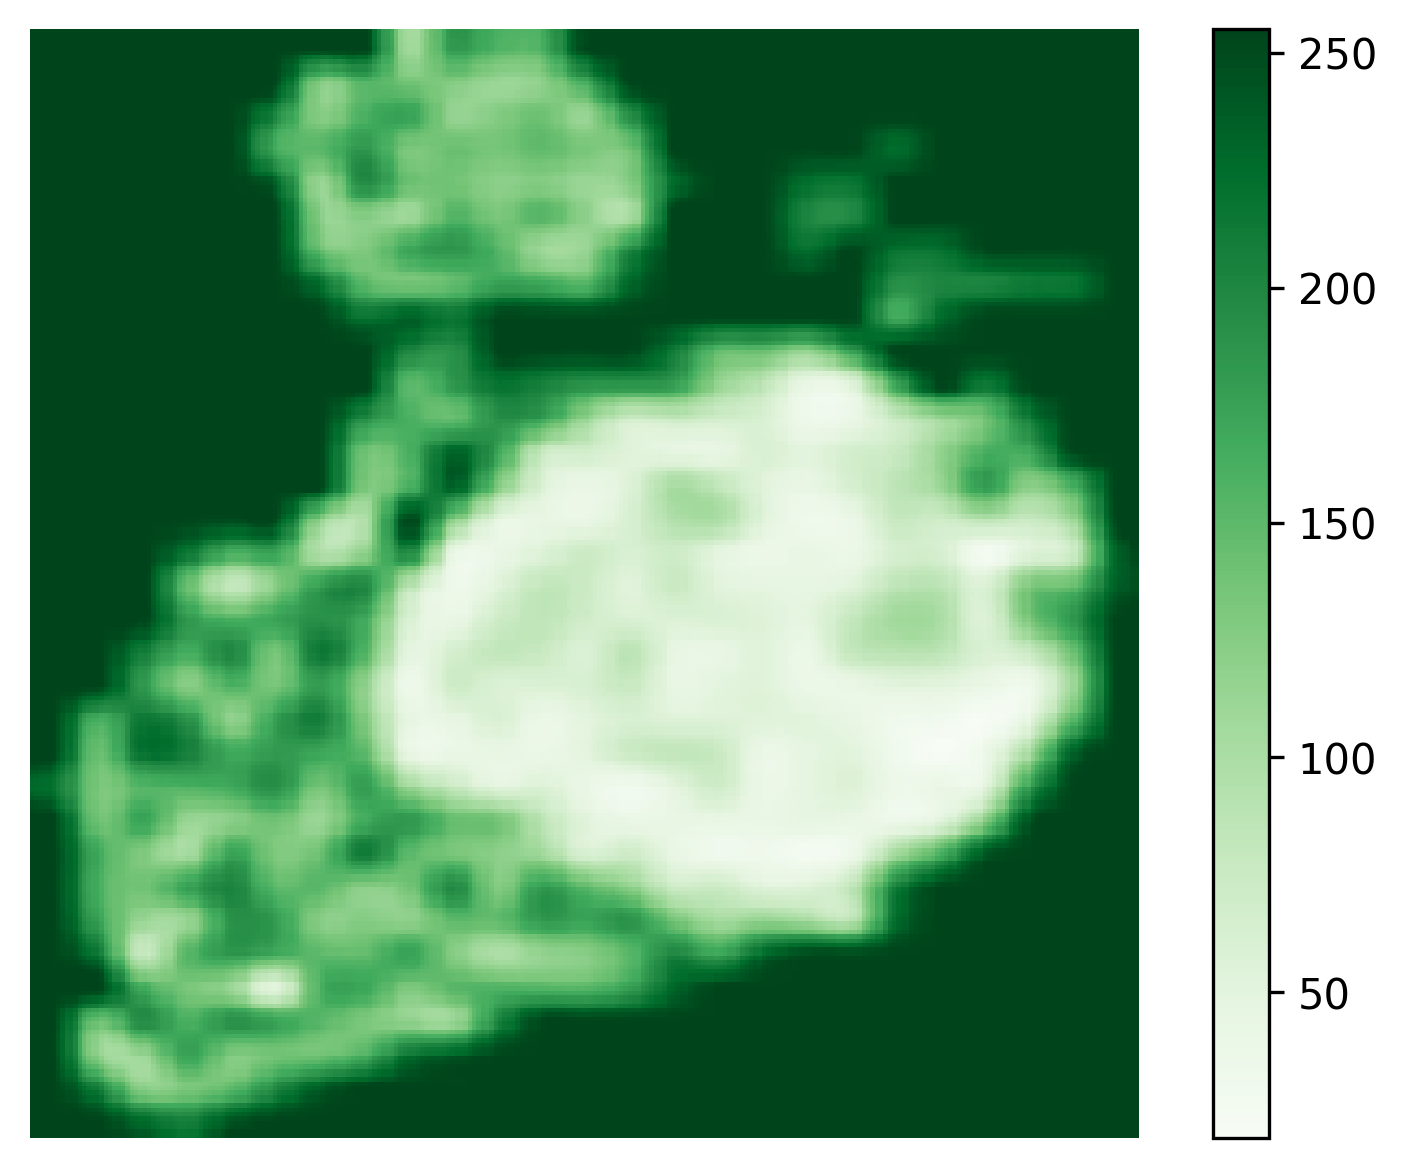

In [ ]:
plt.imshow(img[...,1],cmap="Greens")
plt.colorbar()
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

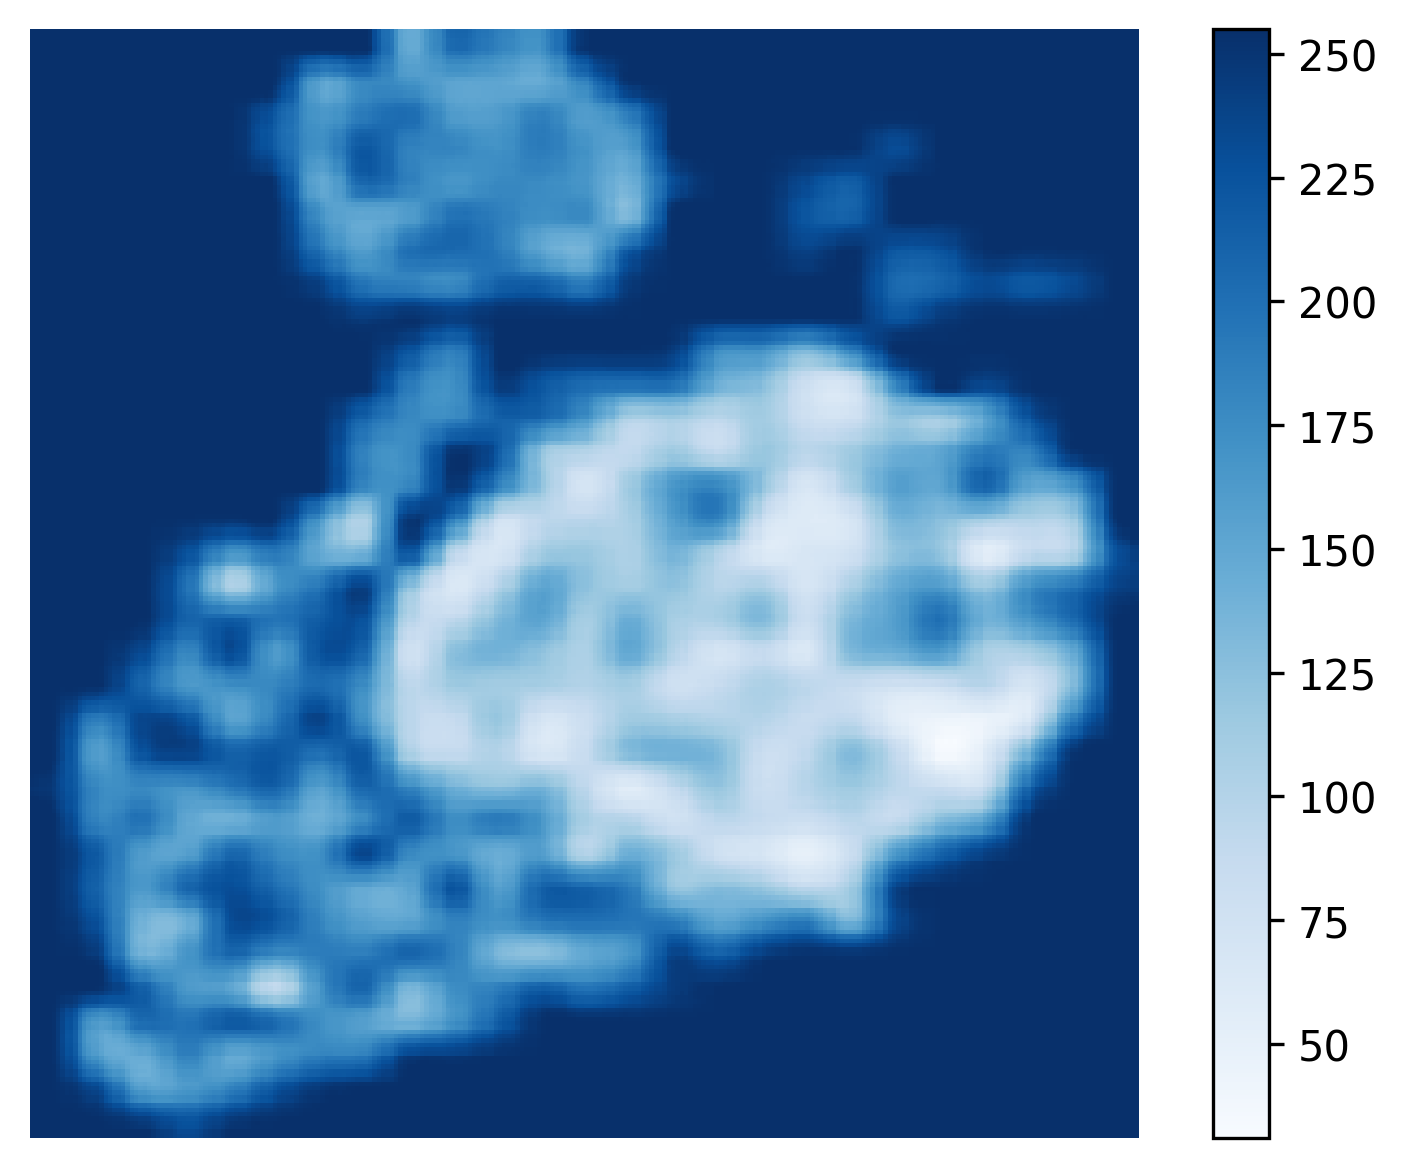

In [ ]:
plt.imshow(img[...,2],cmap="Blues")
plt.colorbar()
plt.axis("off")

# Visual display of numerical values in image  (matrix)

In [ ]:
img_gray_small=cv2.resize(img_gray,None,fx=1/8,fy=1/8)


In [ ]:
img_gray_small.shape

(32, 32)

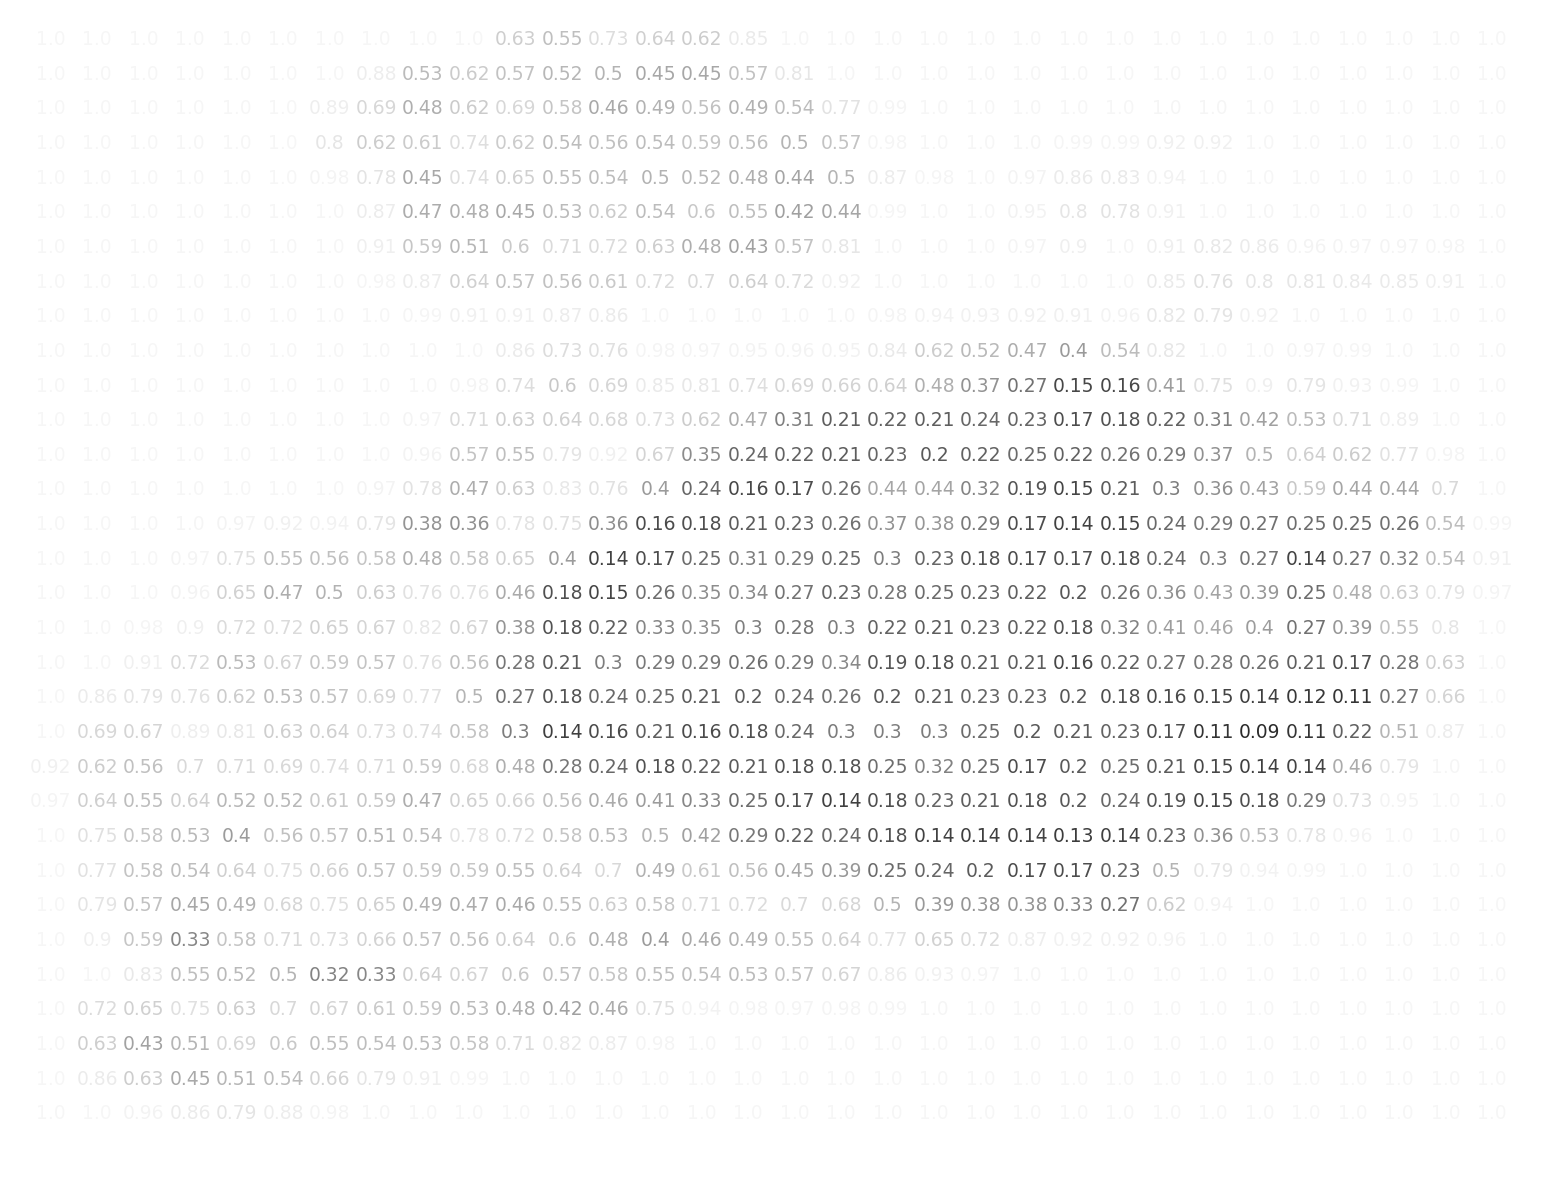

In [ ]:
for i in range(img_gray_small.shape[0]):
    for j in range(img_gray_small.shape[1]):
        text = plt.text(j/img_gray_small.shape[0], i/img_gray_small.shape[1], str(round(img_gray_small[i, j],2)),
                       ha="center", va="center", color="k", alpha=(1-img_gray_small[i, j]/1.5)**3, fontsize=4.5)#**2/2
plt.axis("off")
plt.gca().invert_yaxis()

# Resize Image

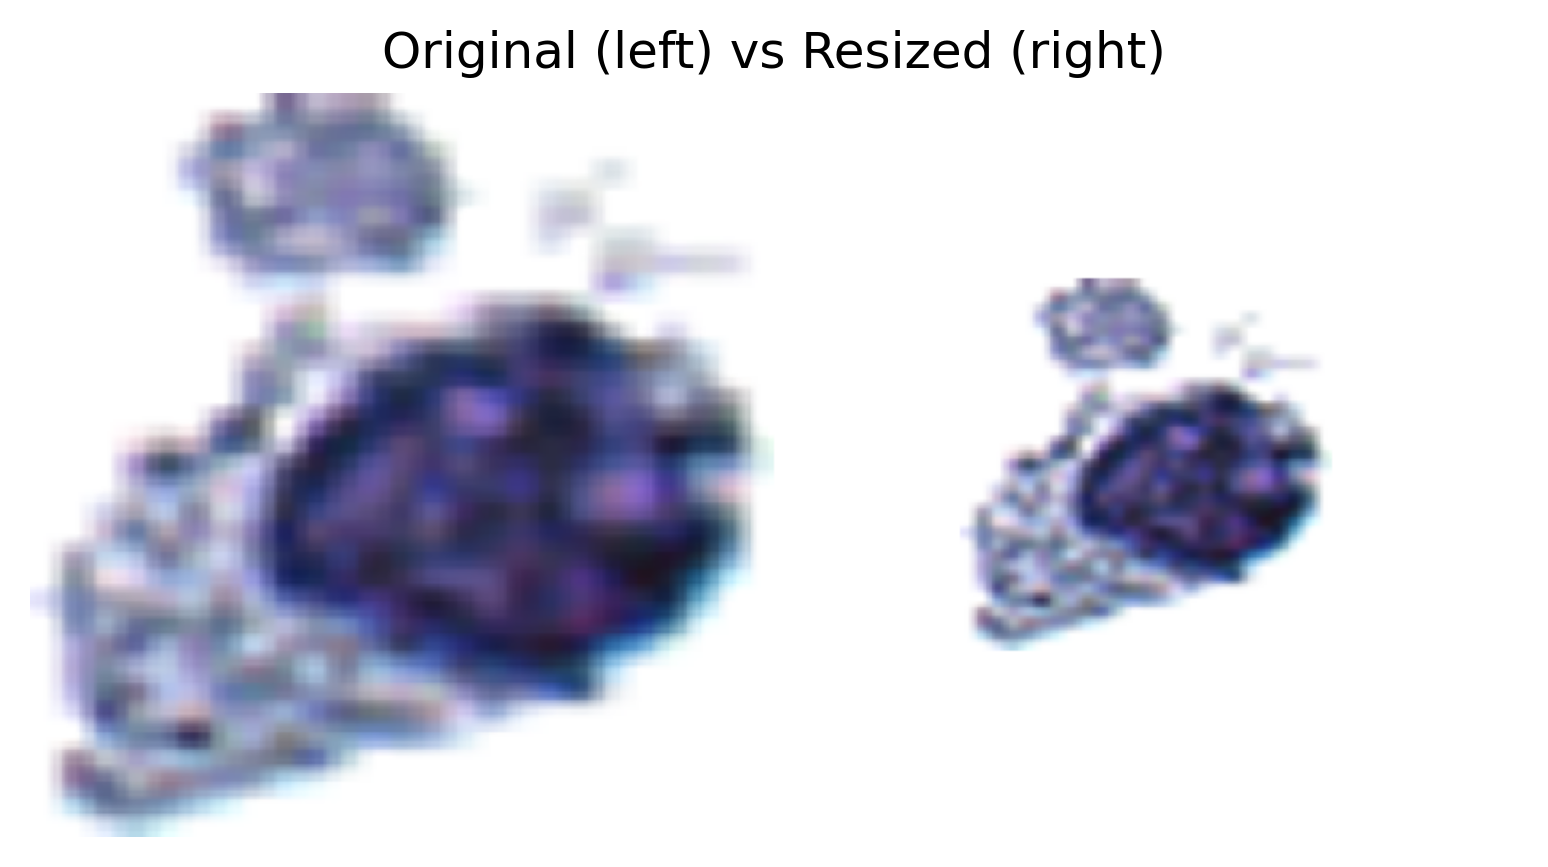

In [ ]:
resized_img = cv2.resize(img, None, fx=1/2, fy=1/2)

pad_width = pad_height = img.shape[0] - resized_img.shape[0]
resized_padded = cv2.copyMakeBorder(
    resized_img,
    top=pad_height//2, bottom=pad_height//2,
    left=pad_width//2, right=pad_width//2,
    borderType=cv2.BORDER_CONSTANT,
    value=[255, 255, 255]
)

concatenated = np.concatenate([img, resized_padded],axis=1)

plt.imshow(concatenated)
plt.axis("off")
plt.title("Original (left) vs Resized (right)")
plt.show()

# Thresholding to identify nucleus and cytoplasm

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

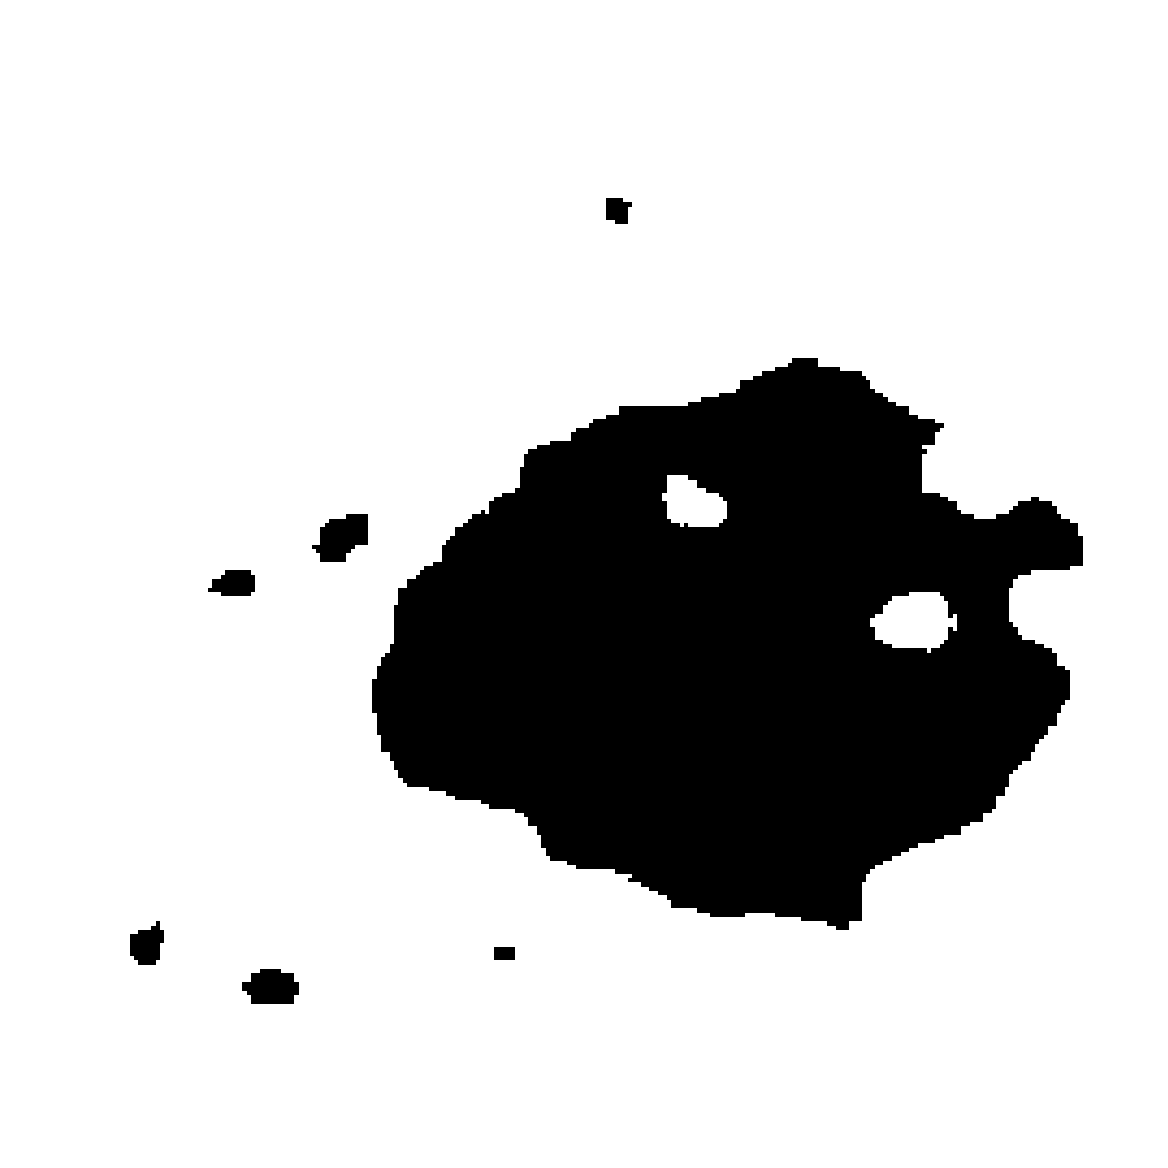

In [ ]:
nucleus=img_gray<0.4
plt.imshow(nucleus,cmap="Greys")
plt.axis("off")

### Morphological operations to improve nucleus prediction

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

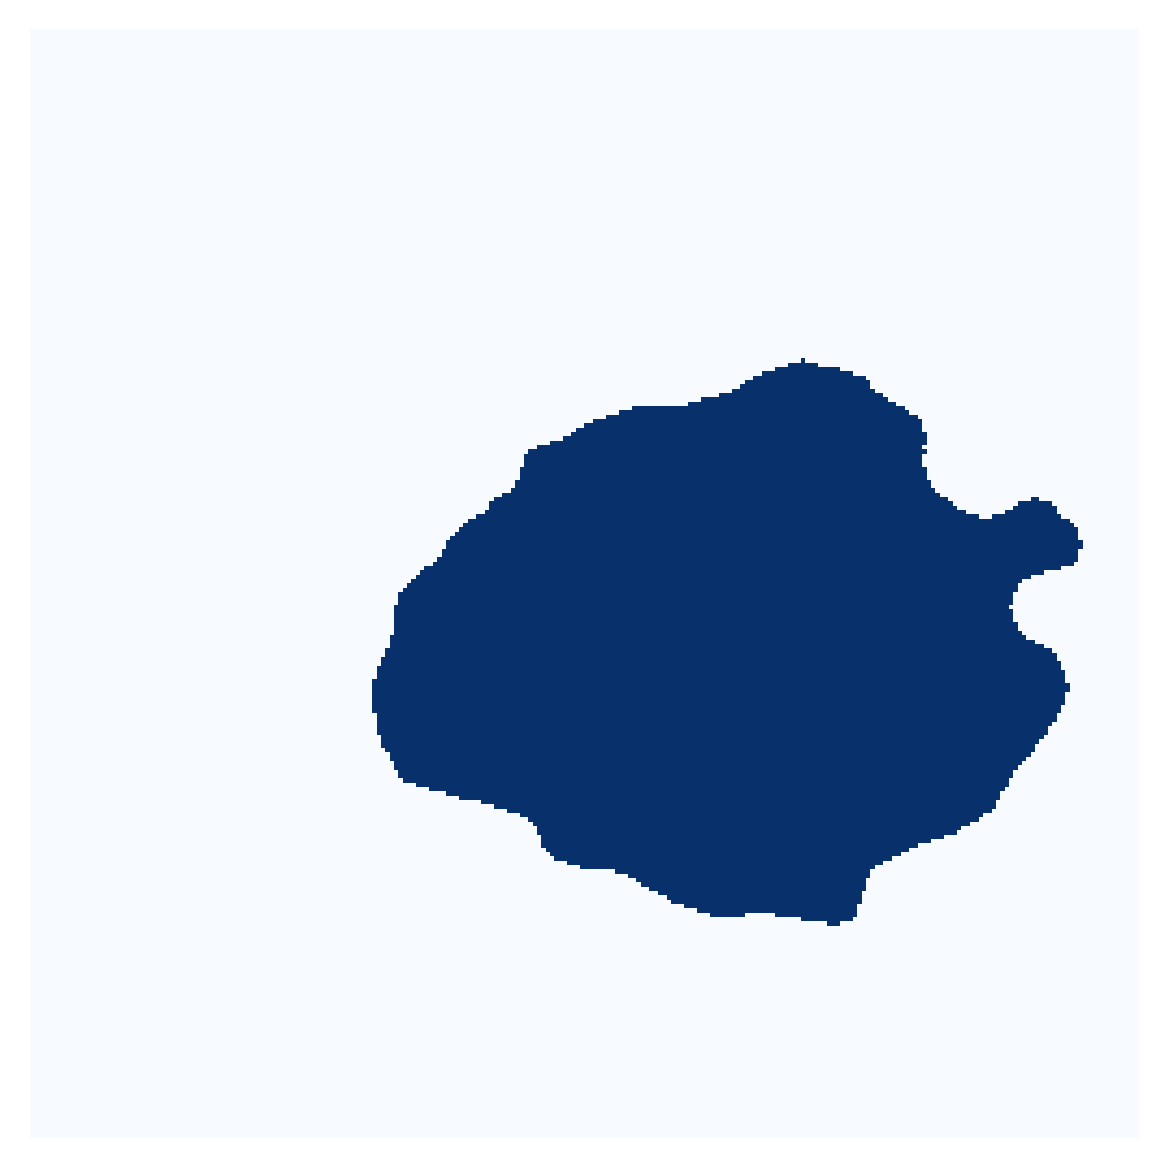

In [ ]:
nucleus=img_gray<0.4
nucleus=binary_opening(nucleus,disk(5)) # binary_opening
# nucleus=binary_erosion(nucleus,disk(5))
# nucleus=binary_dilation(nucleus,disk(5))
nucleus=binary_closing(nucleus,disk(8))
# nucleus=binary_dilation(nucleus,disk(8))
# nucleus=binary_erosion(nucleus,disk(8))
plt.imshow(nucleus,cmap="Blues")
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

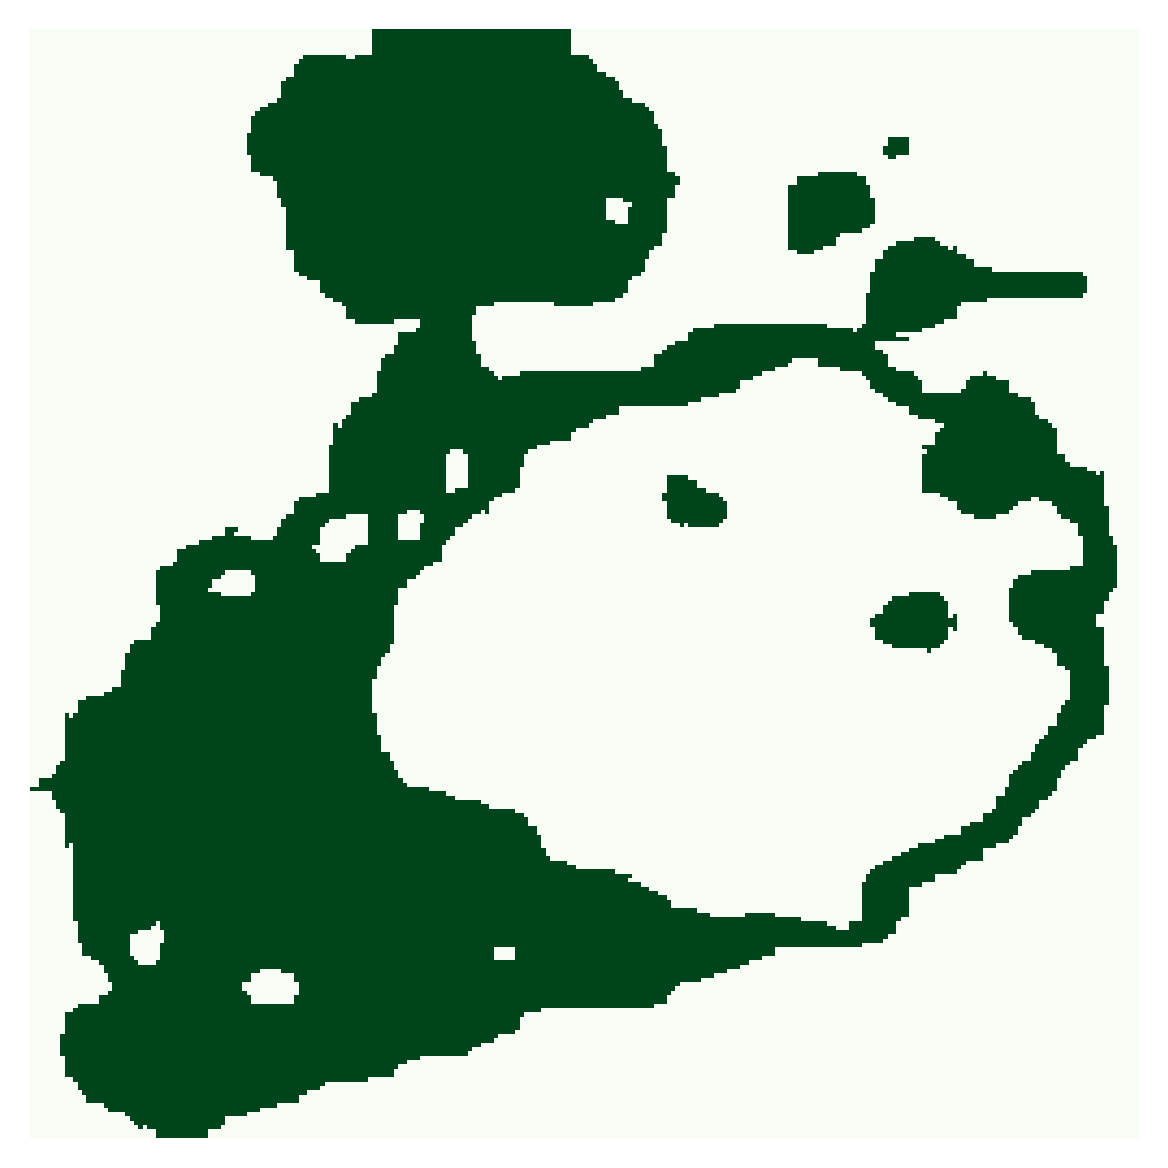

In [ ]:
cytoplasm=np.logical_and(img_gray>=0.4,img_gray<=0.8)
plt.imshow(cytoplasm,cmap="Greens")
plt.axis("off")

## Calculate NC ratio

In [ ]:
nc_ratio_pred=nucleus.sum()/(nucleus.sum()+cytoplasm.sum())

In [ ]:
nc_ratio_pred

np.float64(0.41576448792913795)

In [ ]:
nucleus

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(256, 256))

In [ ]:
cytoplasm

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(256, 256))

# Visualize true segmentation mask

In [ ]:
lbl=labels[img_idx]

In [ ]:
# np.unique(lbl)
# (lbl==2).sum()

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

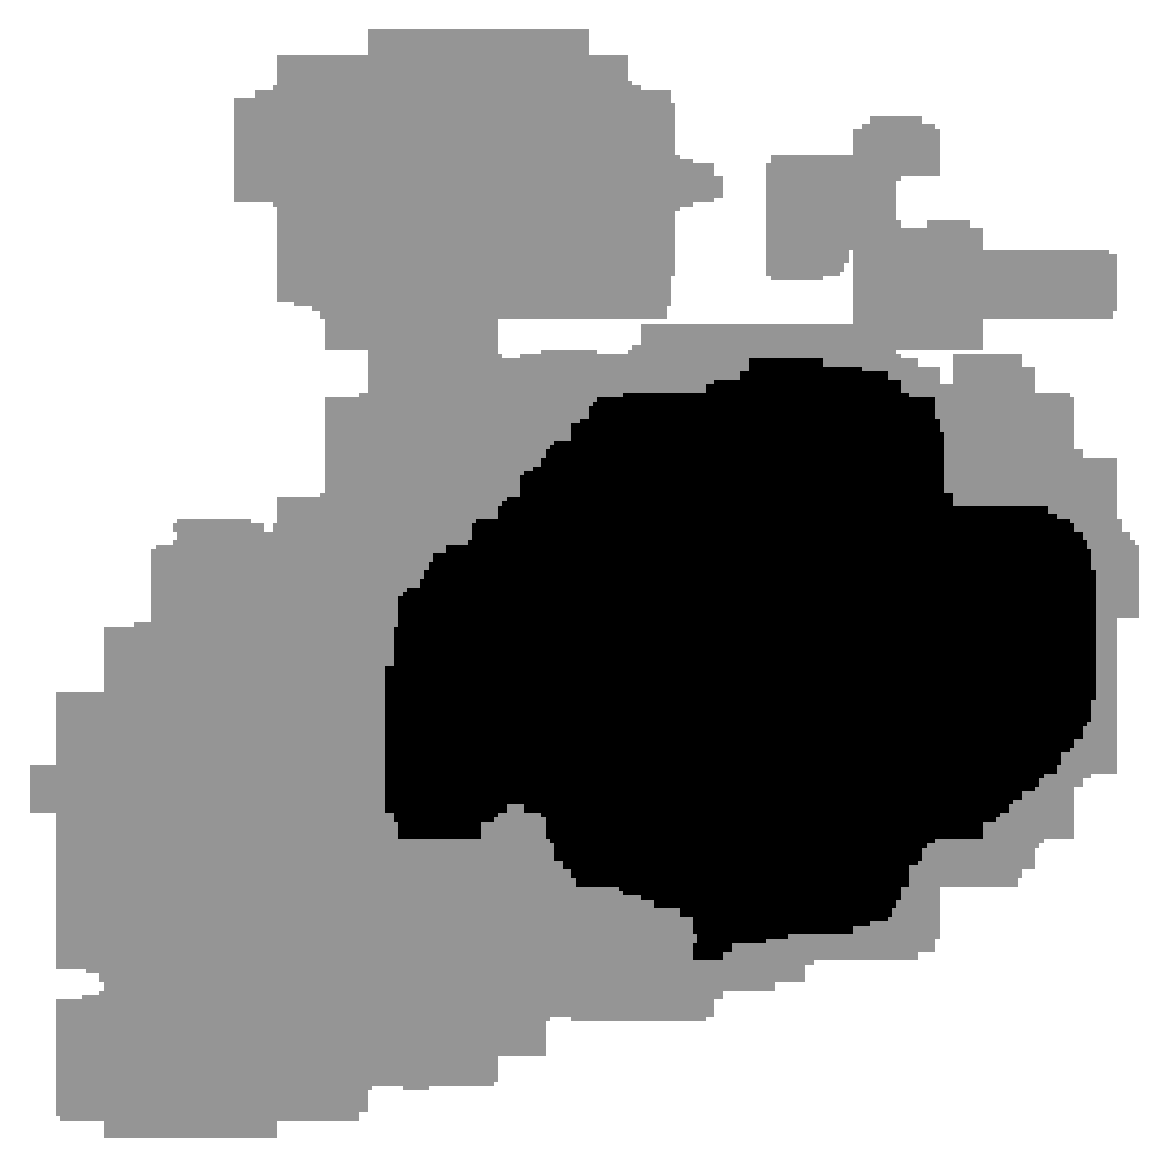

In [ ]:
plt.imshow(lbl,cmap="Greys")# plt.imshow((lbl+1)%3,cmap="RdBu")
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

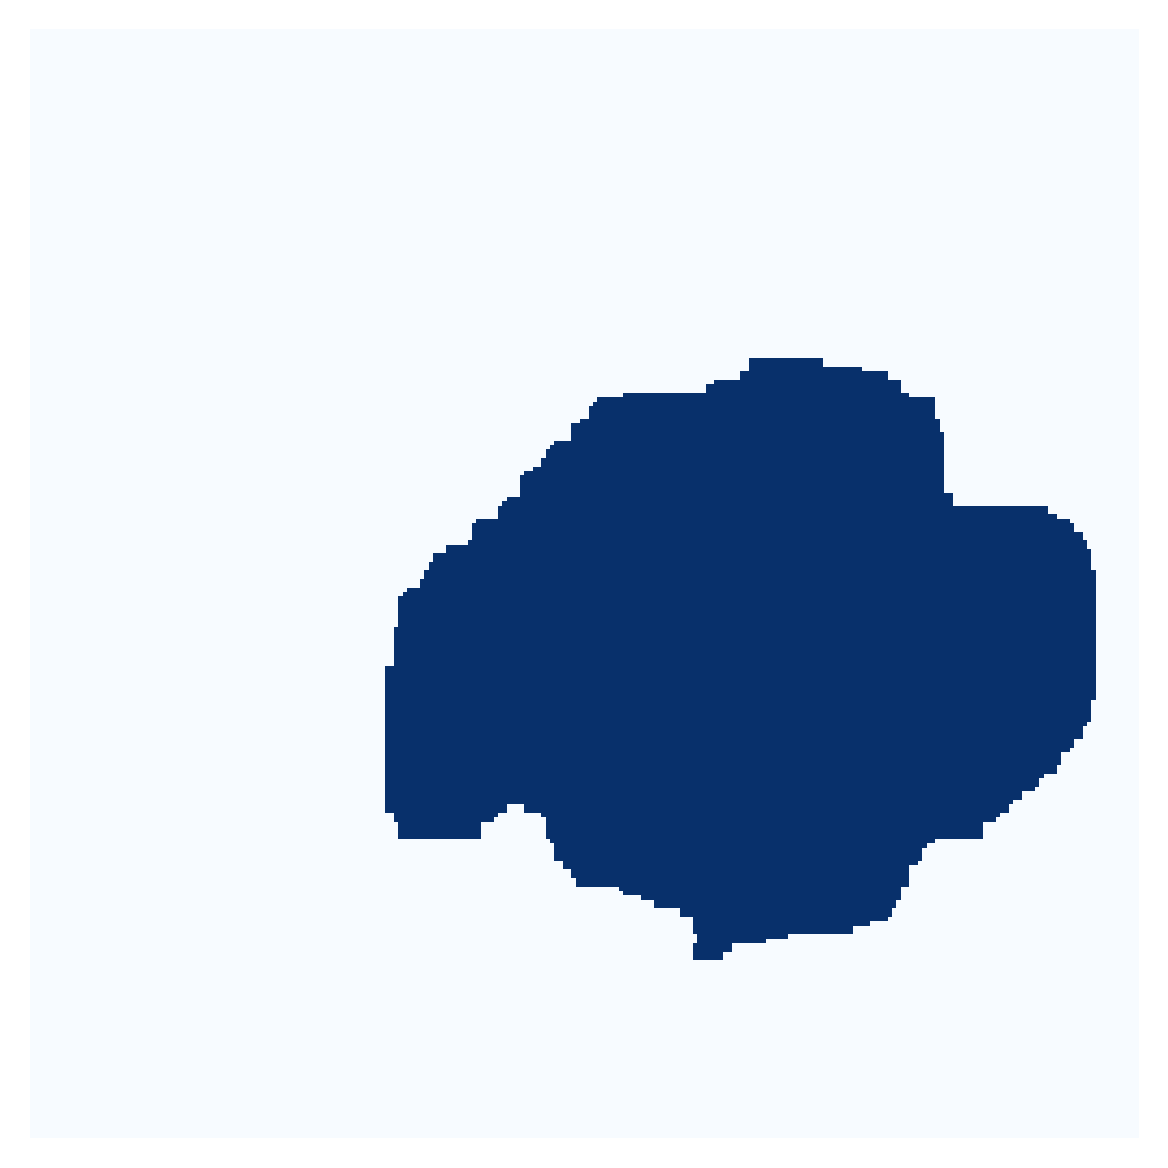

In [ ]:
nucleus_true=(lbl==2)
plt.imshow(nucleus_true,cmap="Blues")
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

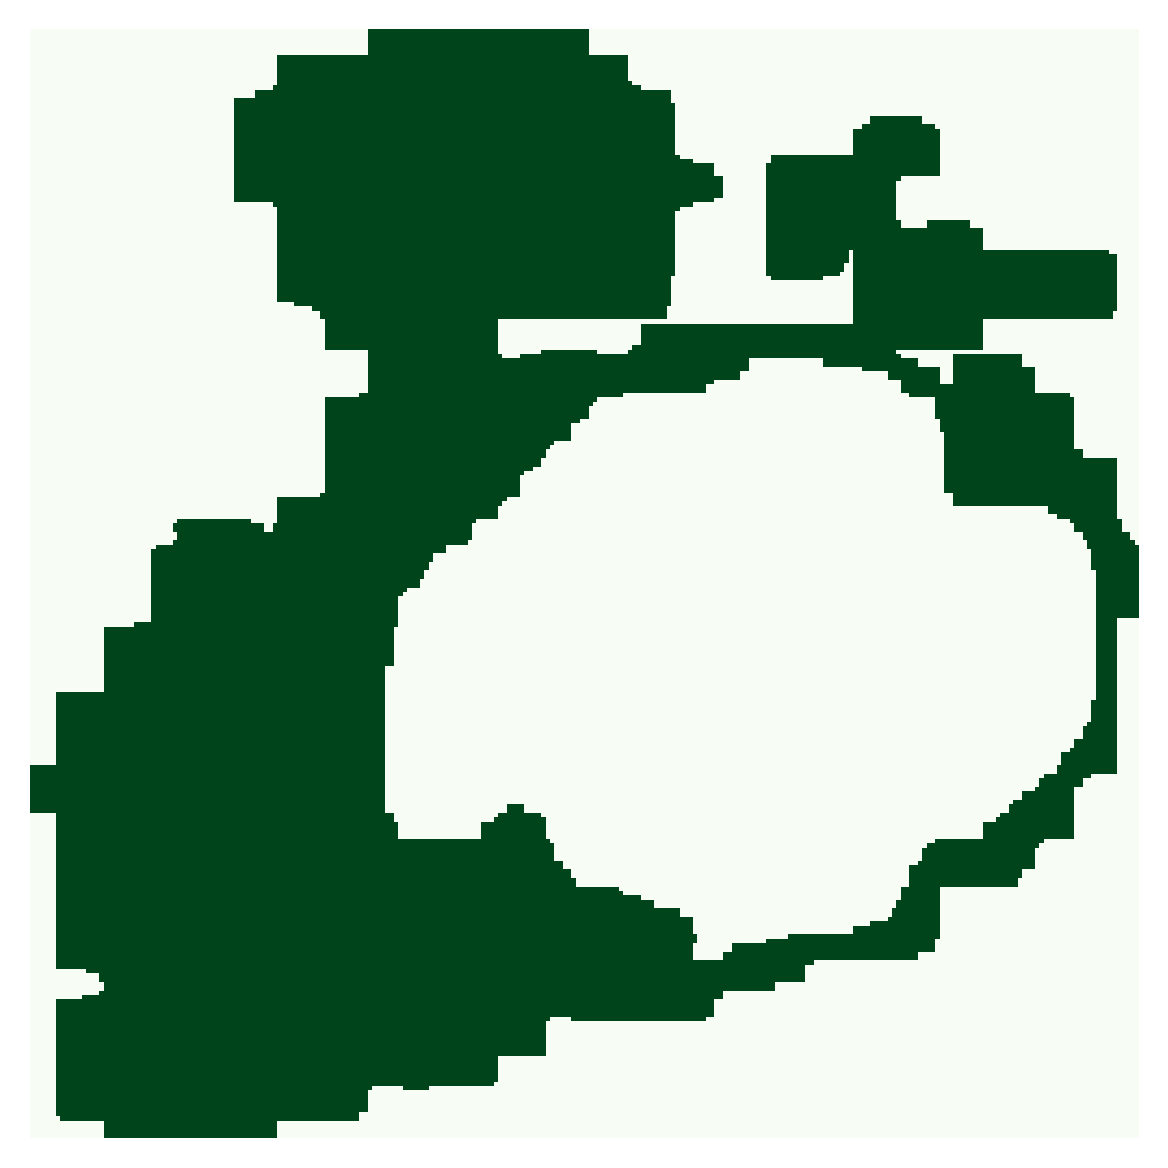

In [ ]:
cytoplasm_true=(lbl==1)
plt.imshow(cytoplasm_true,cmap="Greens")
plt.axis("off")

## Calculate true NC ratio and compare

In [ ]:
nc_ratio_true=nucleus_true.sum()/(nucleus_true.sum()+cytoplasm_true.sum())

In [ ]:
nc_ratio_true,nc_ratio_pred

(np.float64(0.3643818624523361), np.float64(0.41576448792913795))

In [ ]:
np.abs(nc_ratio_true-nc_ratio_pred)

np.float64(0.051382625476801835)

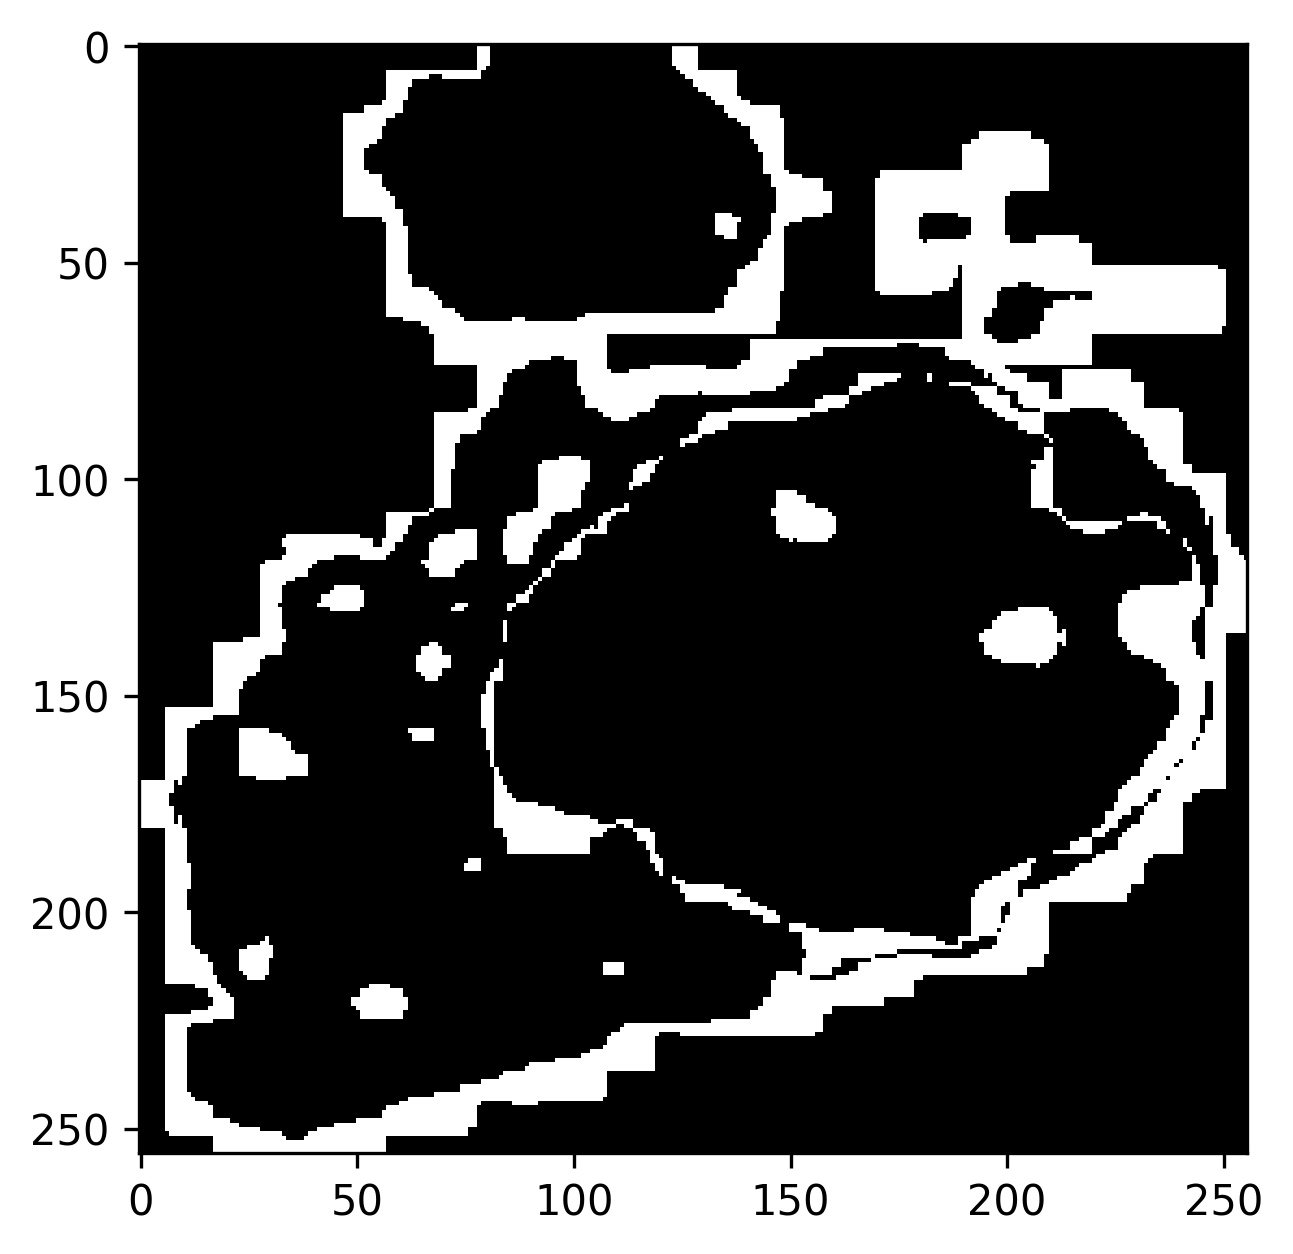

In [ ]:
plt.imshow(cytoplasm==cytoplasm_true,cmap="Greys")

In [ ]:
(cytoplasm==cytoplasm_true).mean()

np.float64(0.82586669921875)

# Extract bounding box of nucleus

In [ ]:
rp=regionprops(nucleus_true.astype(int))
xmin,ymin,xmax,ymax=rp[0].bbox

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

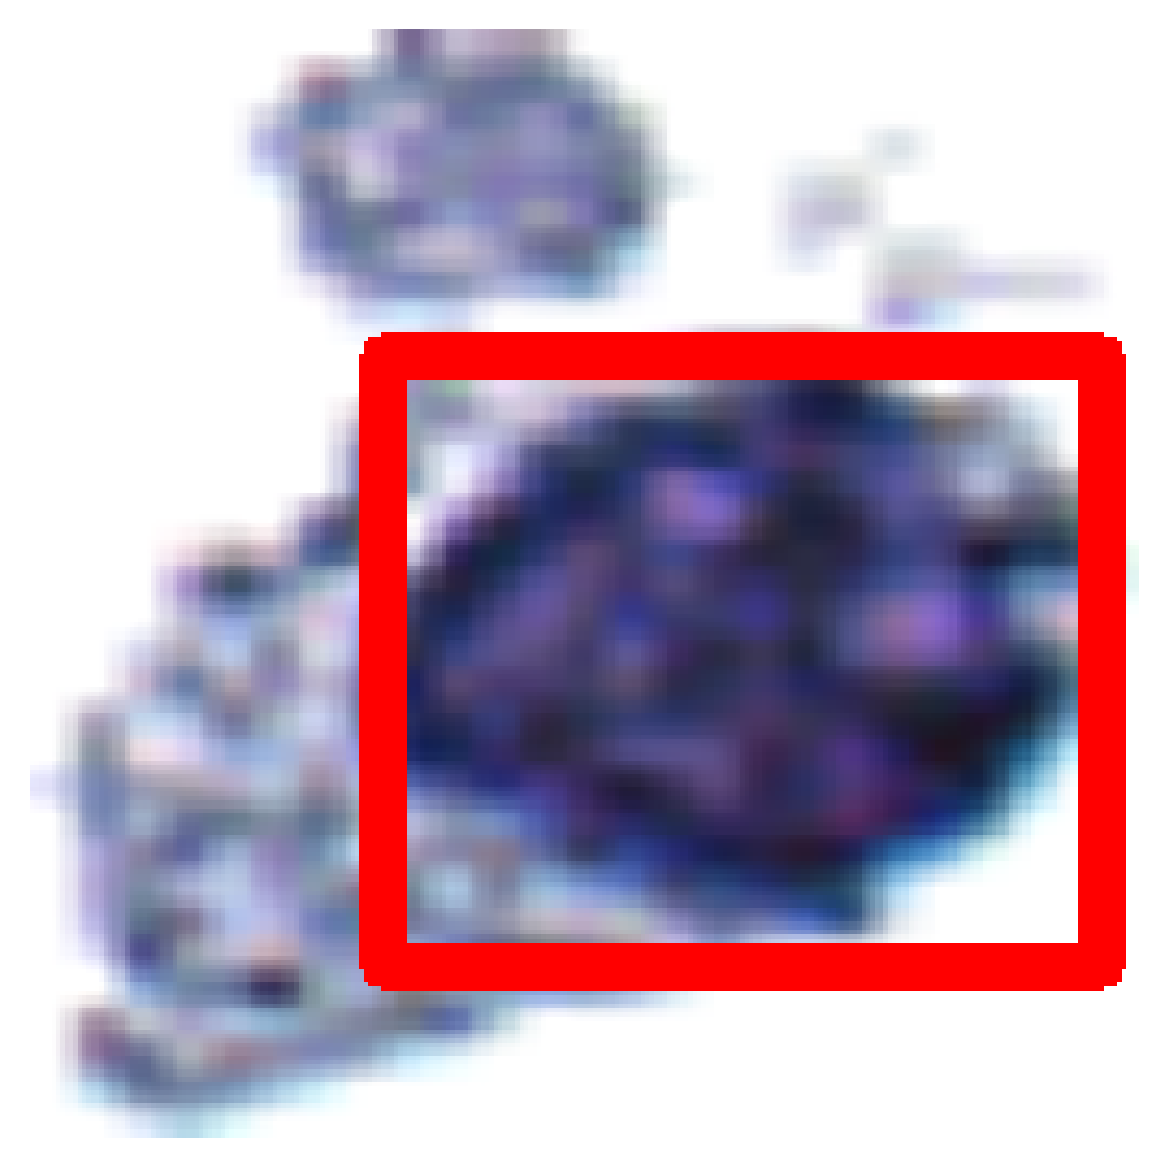

In [ ]:
r,c=rectangle_perimeter((xmin,ymin),(xmax,ymax))
rec_lbl=np.zeros(lbl.shape)
rec_lbl[r,c]=1
rec_lbl=binary_dilation(rec_lbl,disk(5))
img_new=img.copy()
img_new[rec_lbl]=[255,0,0]

plt.imshow(img_new)
plt.axis("off")

# Slice image and plot

(np.float64(-0.5), np.float64(163.5), np.float64(138.5), np.float64(-0.5))

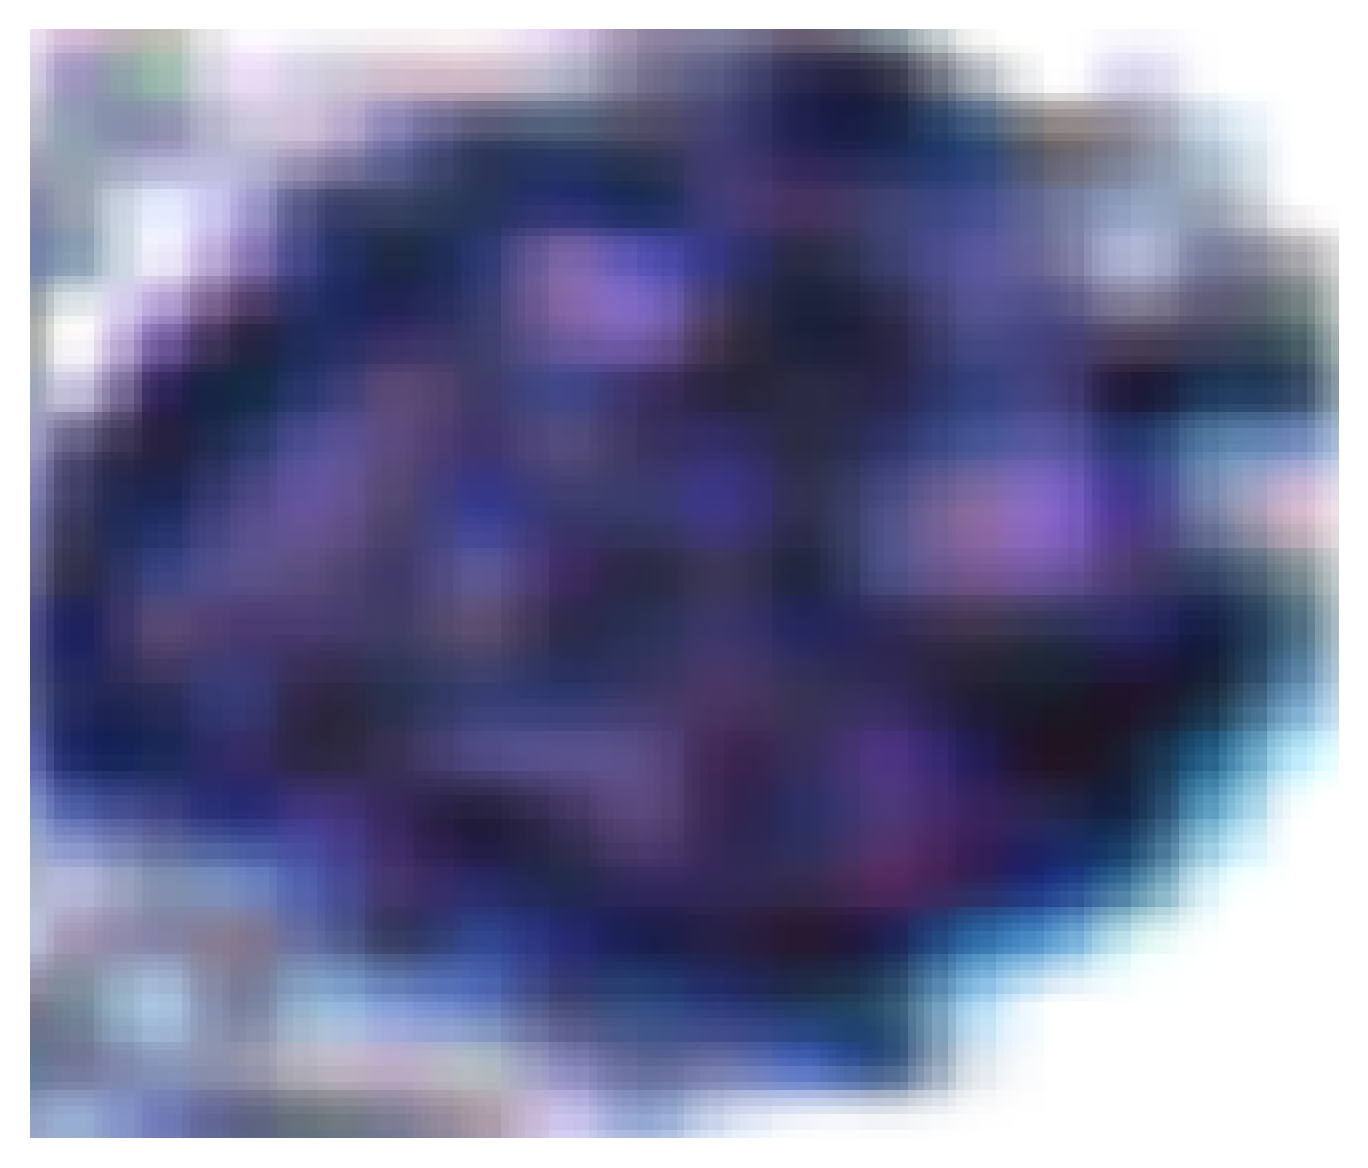

In [ ]:
plt.imshow(img[xmin:xmax,ymin:ymax])
plt.axis("off")

# Features & Filters
## Blur image with Gaussian filter

((np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5)),
 Text(0.5, 1.0, 'Blurred Image'))

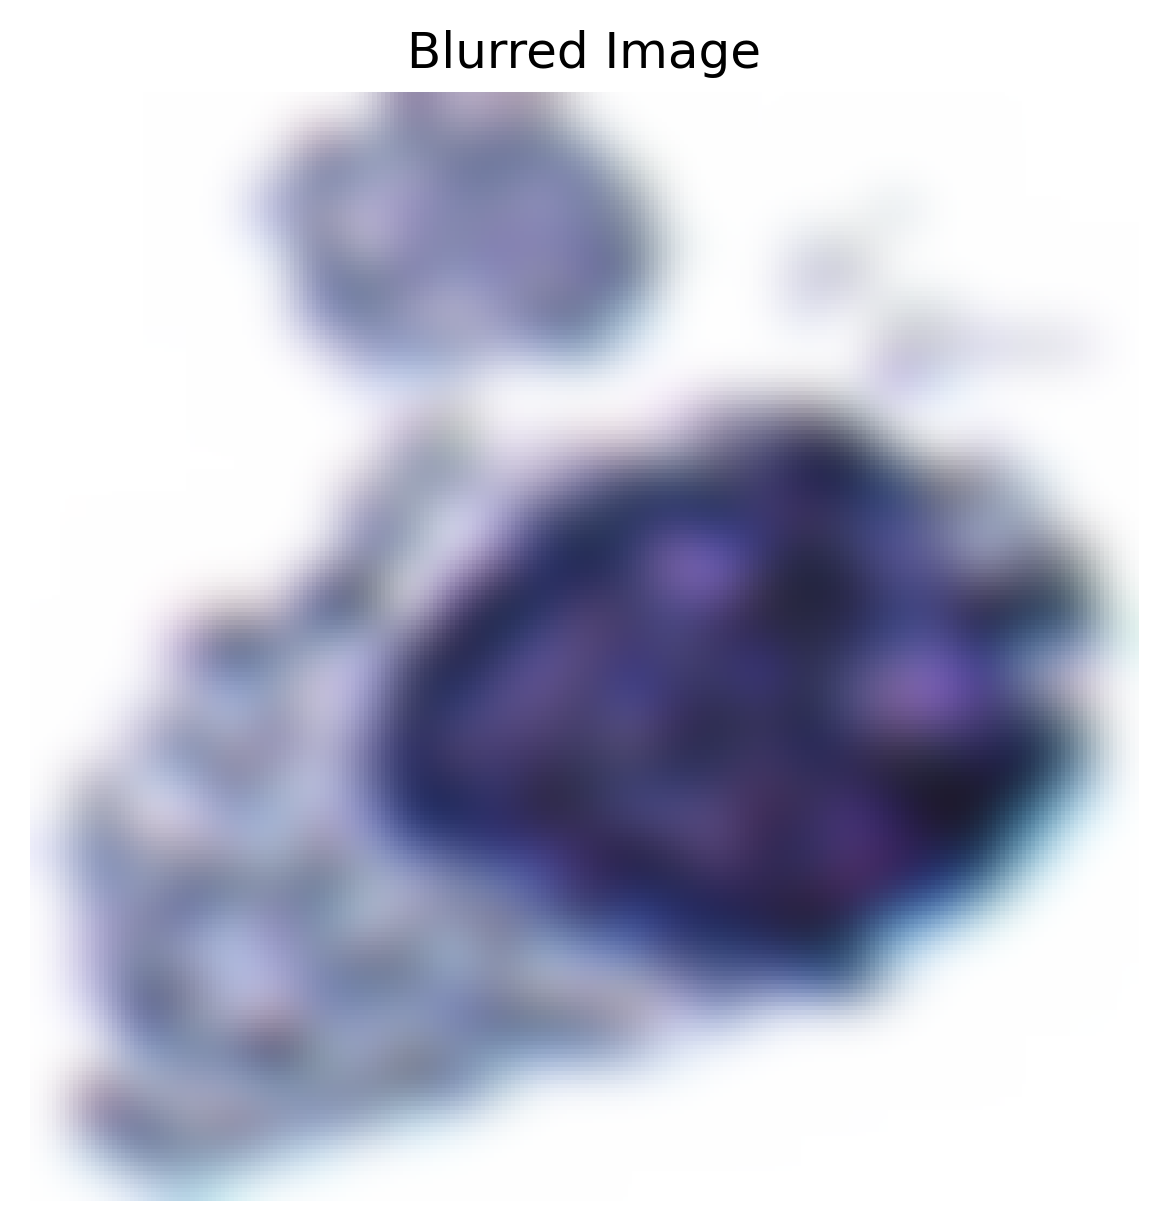

In [ ]:
blurred_image=gaussian(img,sigma=5,channel_axis=2)
plt.imshow(blurred_image)
plt.axis('off'), plt.title('Blurred Image')



## Run sobel filter to detect edges

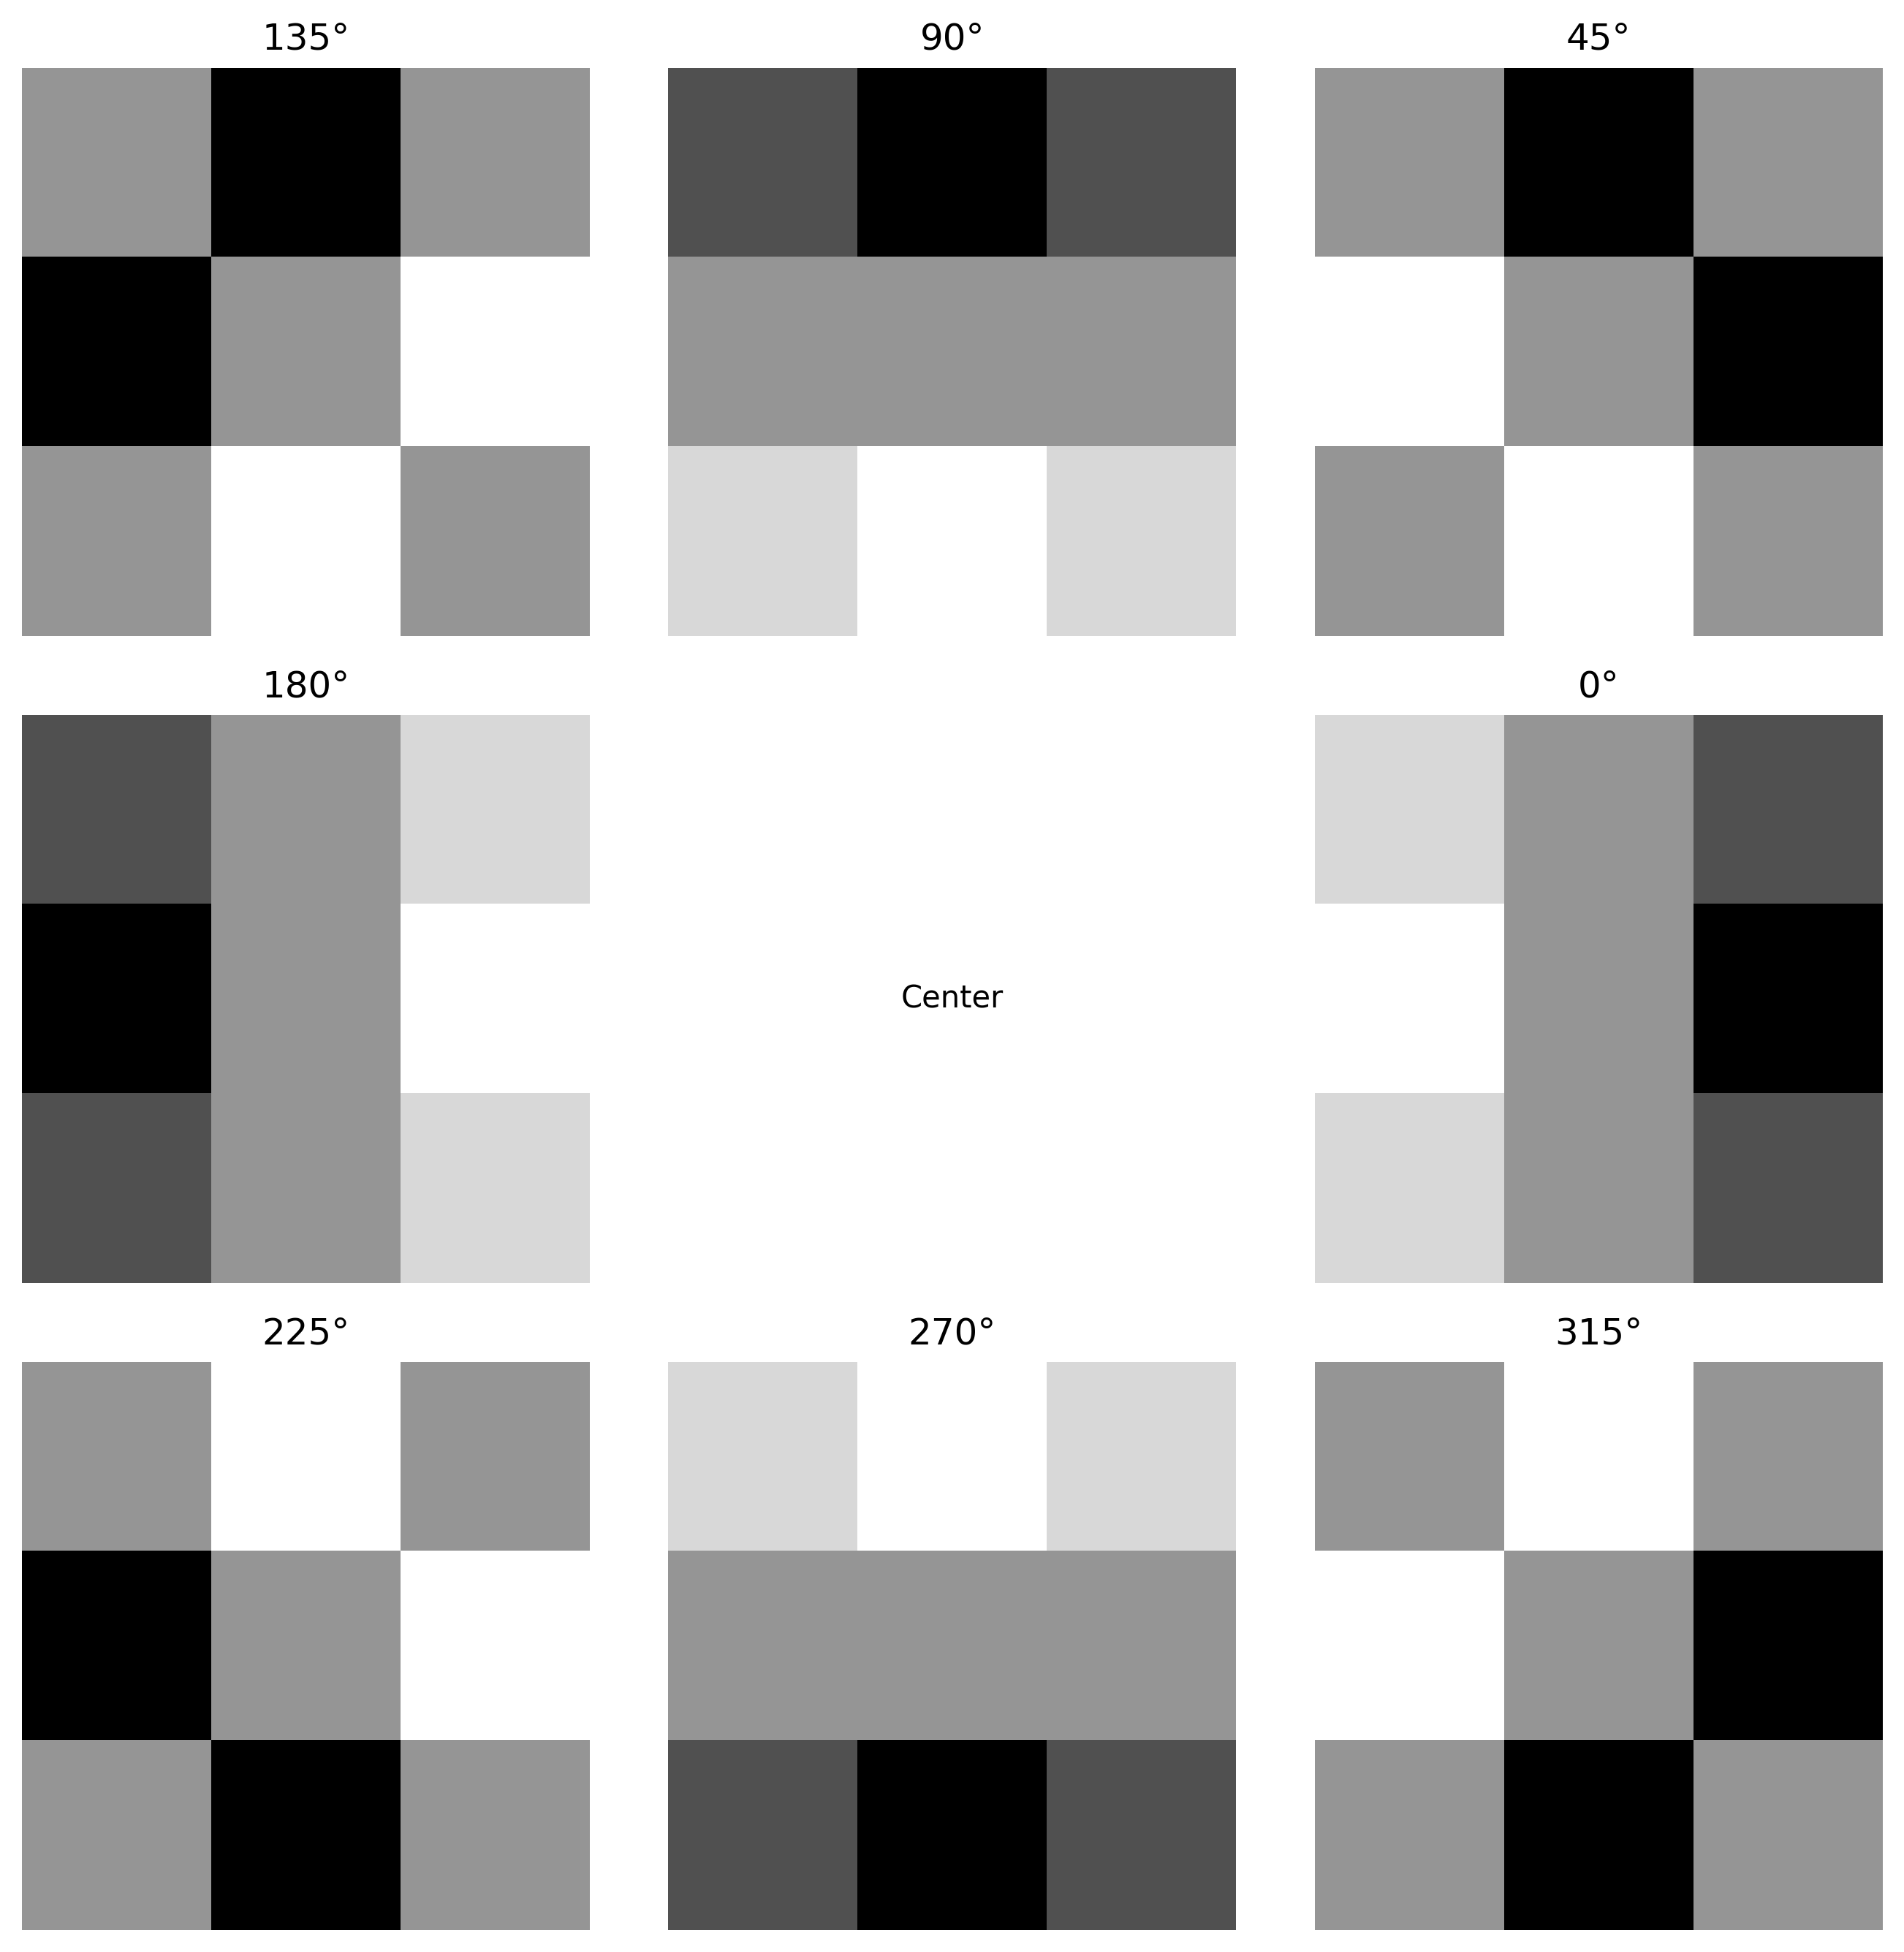

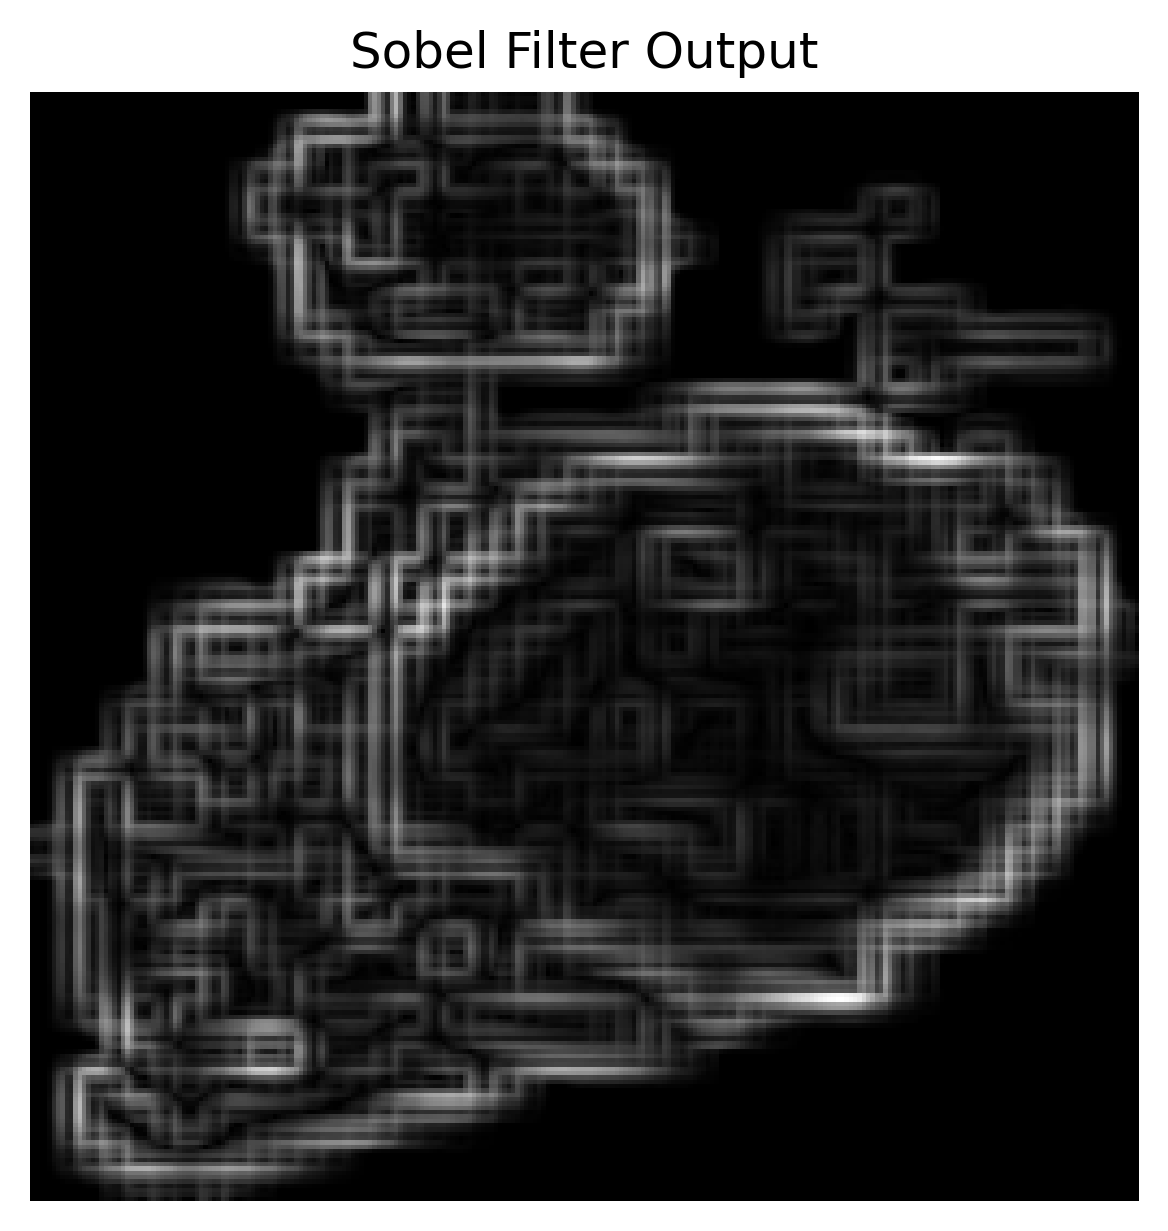

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Base Sobel X filter & rotated versions
base = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
angles = [135, 90, 45, 180, 0, 225, 270, 315]
filters_rot = [rotate(base, a, reshape=False) for a in angles]

# Plot filters in 3x3 grid
fig, ax = plt.subplots(3, 3, figsize=(9, 9))
ax = ax.ravel()
for i, (a, f) in enumerate(zip(angles, filters_rot)):
    idx = i if i < 4 else i + 1
    ax[idx].imshow(f, cmap='Greys'), ax[idx].set_title(f'{a}°'), ax[idx].axis('off')
ax[4].axis('off')
ax[4].text(0.5, 0.5, 'Center', ha='center', va='center')
plt.tight_layout(), plt.show()

# Show default sobel magnitude
plt.imshow(sobel(img_gray), cmap='gray')
plt.axis('off'), plt.title('Sobel Filter Output')
plt.show()

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

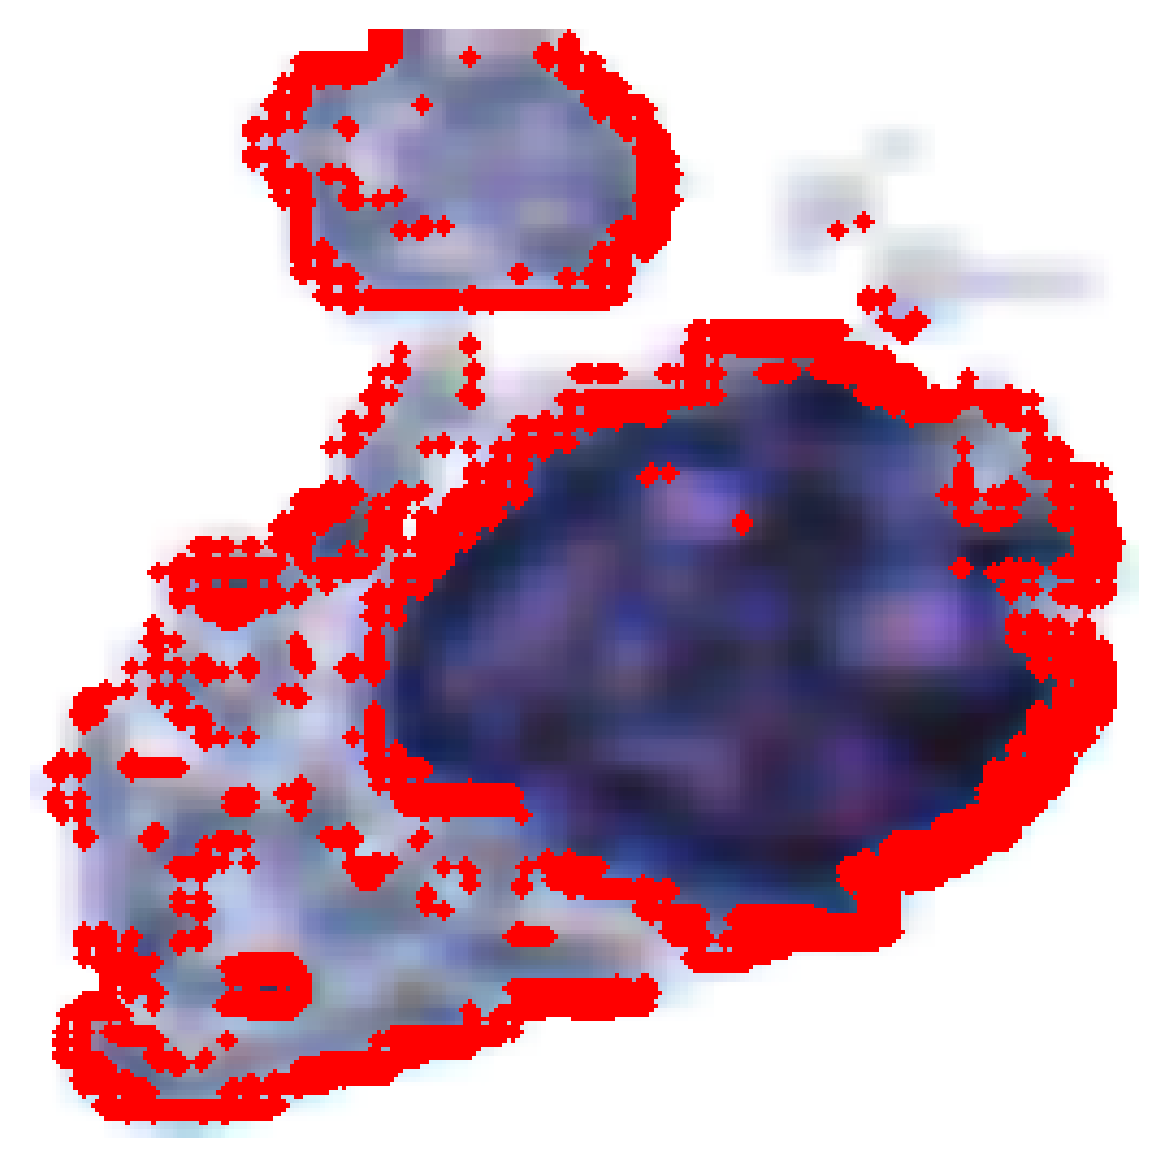

In [ ]:
edges=binary_opening(sobel(img_gray)>0.03,disk(2))
img_new=img.copy()
img_new[edges]=[255,0,0]
plt.imshow(img_new)
plt.axis("off")

## Smooth sobel filter with additional morphological operations to improve edge detection

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

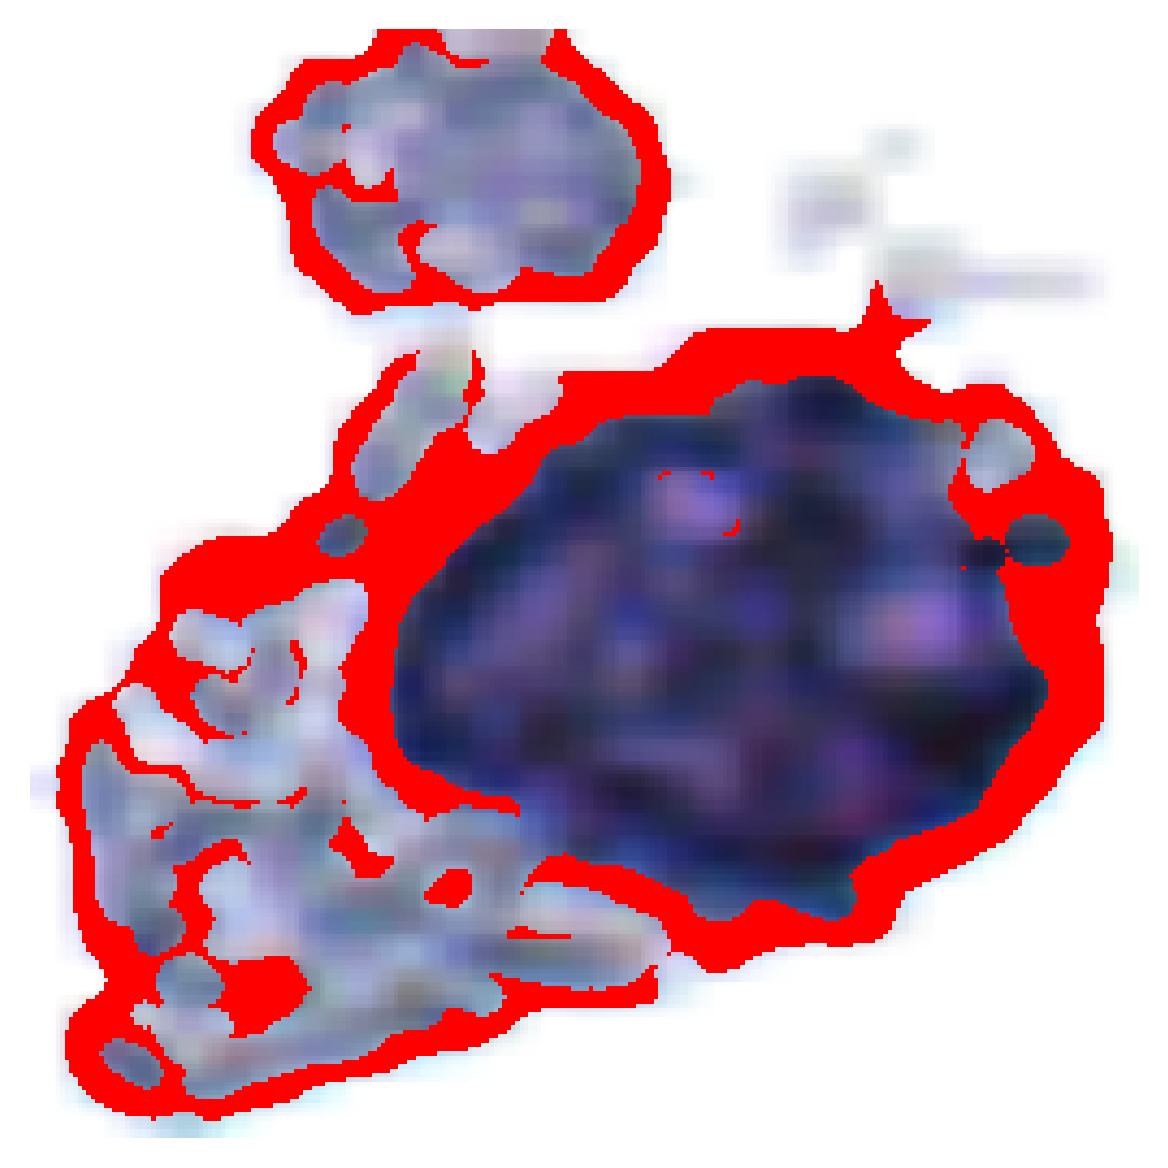

In [ ]:
edges=gaussian(sobel(img_gray),sigma=2)>0.03
edges=binary_erosion(binary_opening(edges,disk(2)),disk(3))
img_new=img.copy()
img_new[edges]=[255,0,0]
plt.imshow(img_new)
plt.axis("off")

## Canny edge detection

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

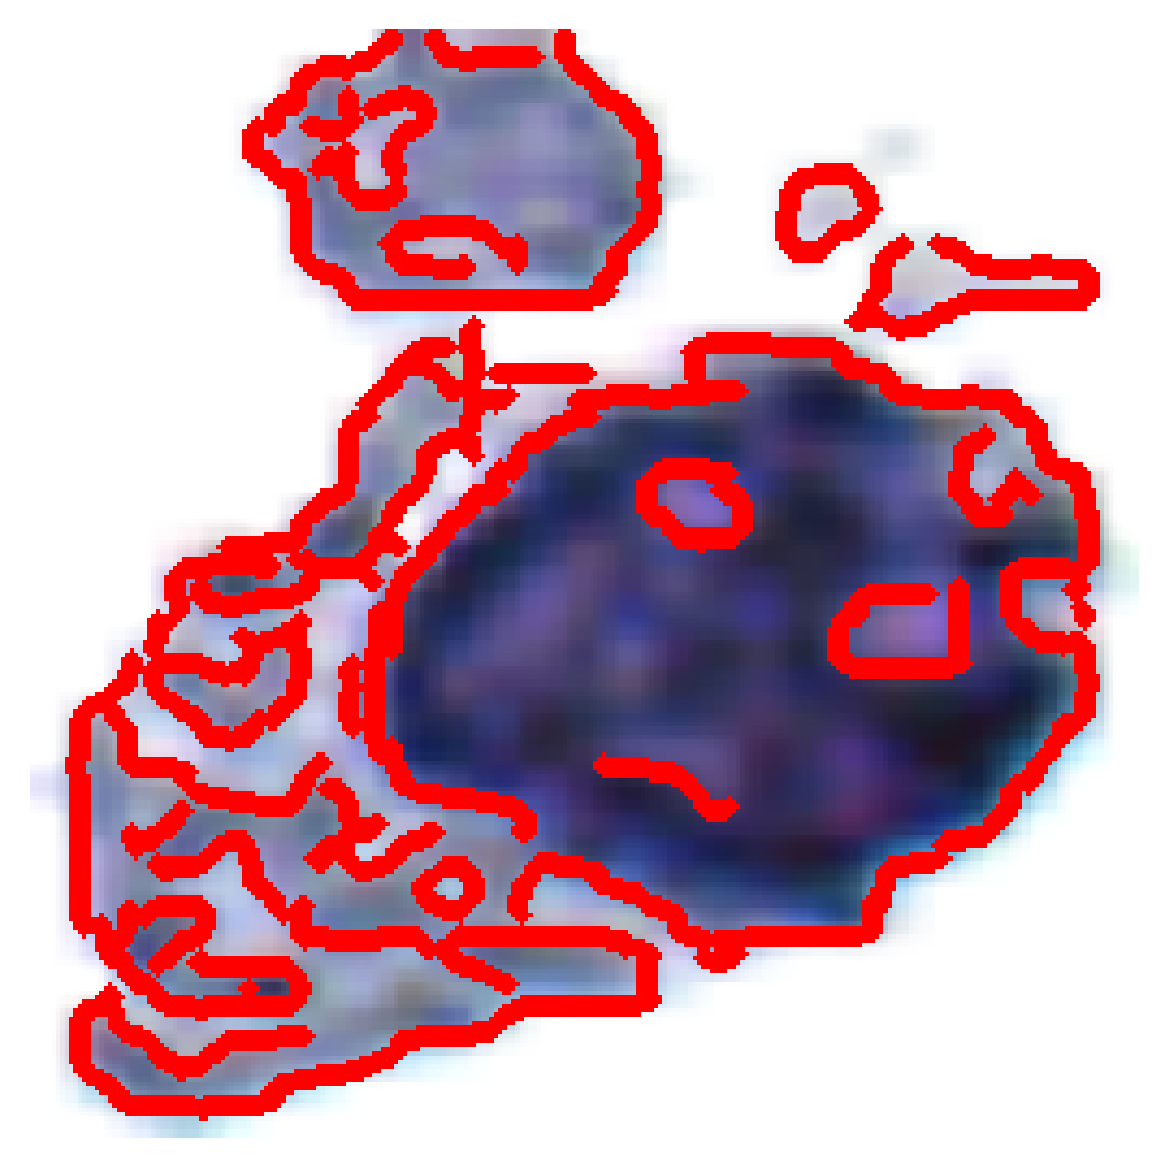

In [ ]:
edges=binary_dilation(canny(img_gray, sigma=2.),disk(2))
img_new=img.copy()
img_new[edges]=[255,0,0]
plt.imshow(img_new)
plt.axis("off")


# Connected component analysis
### Identify cell

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

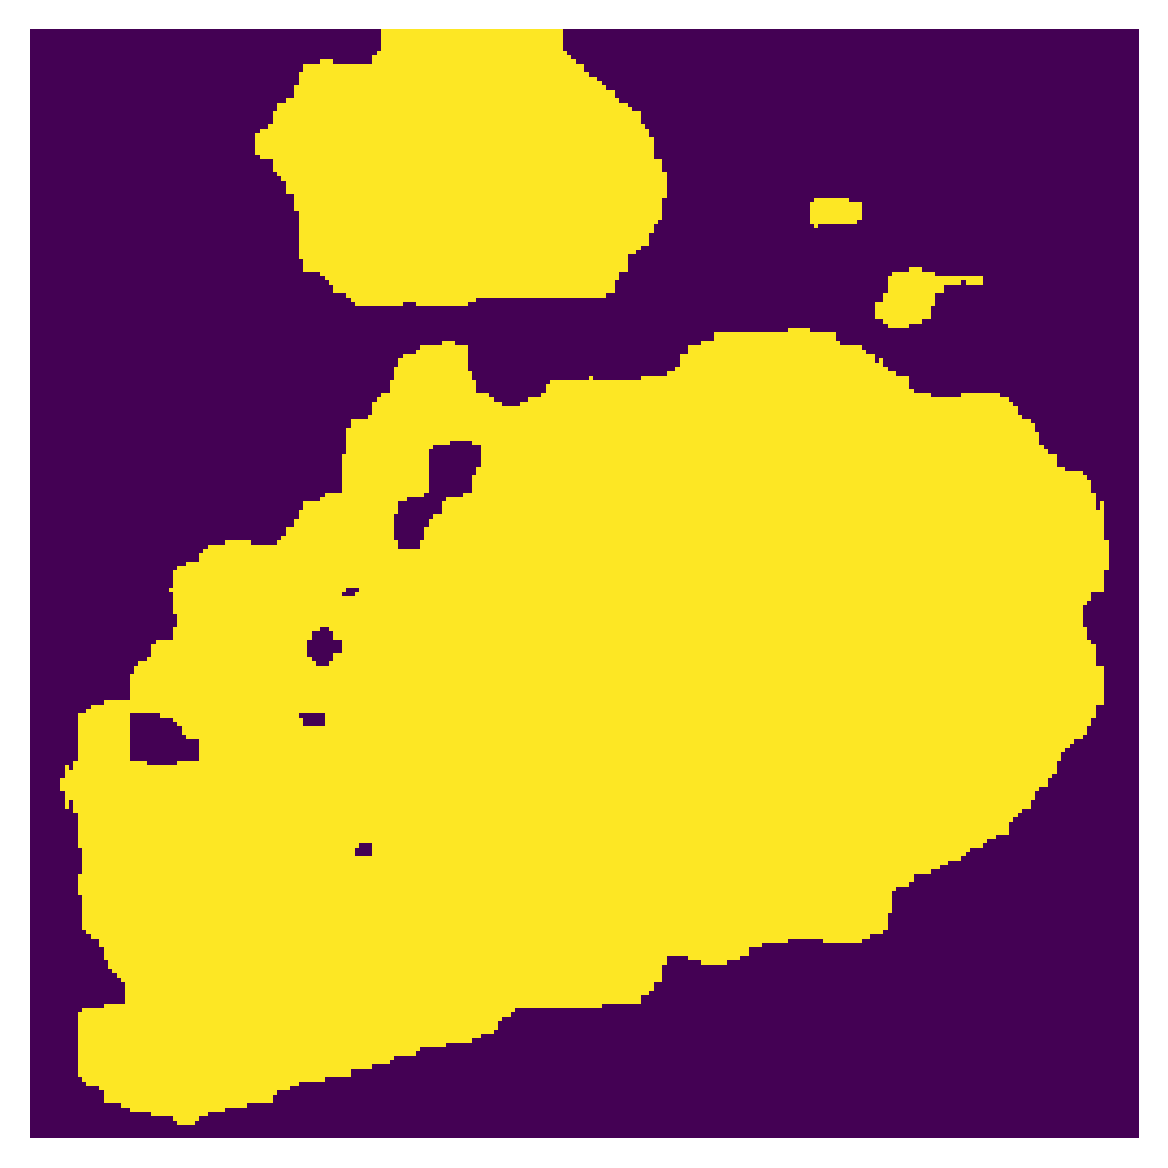

In [ ]:
cell=img_gray<=0.8

plt.imshow(cell)
plt.axis("off")

### Divide into components

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

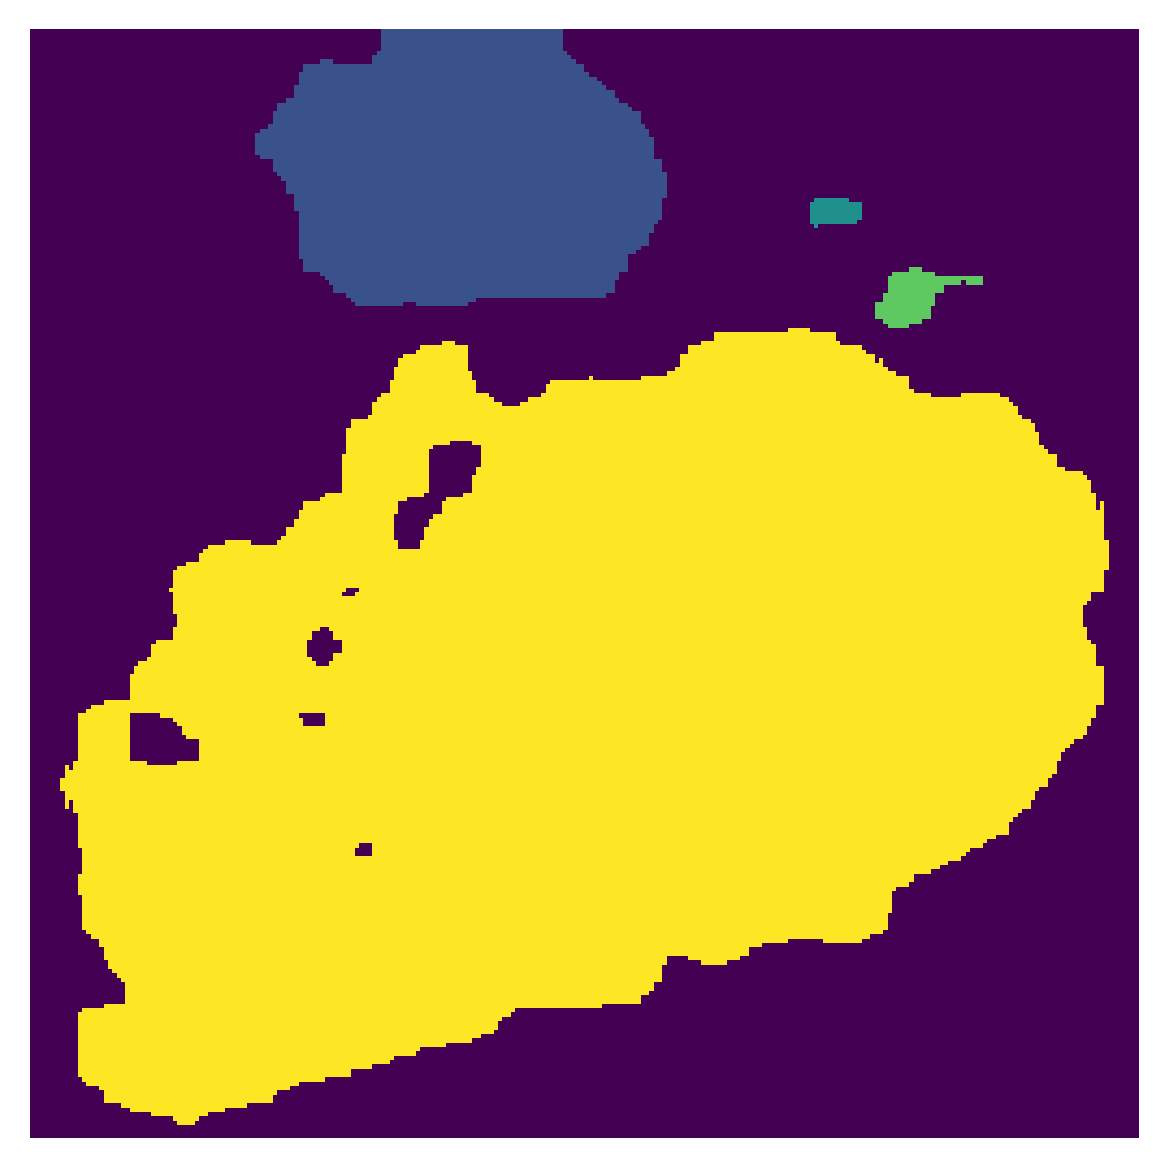

In [ ]:
lbls=scilabel(cell)[0]
plt.imshow(lbls)
plt.axis("off")

## Sort components by area and take largest area component

In [ ]:
rp=regionprops_table(lbls,properties=["label","area"])
rp=pd.DataFrame(rp).sort_values("area",ascending=False)
rp

,label,area
3,4,29590.0
0,1,4743.0
2,3,173.0
1,2,68.0


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

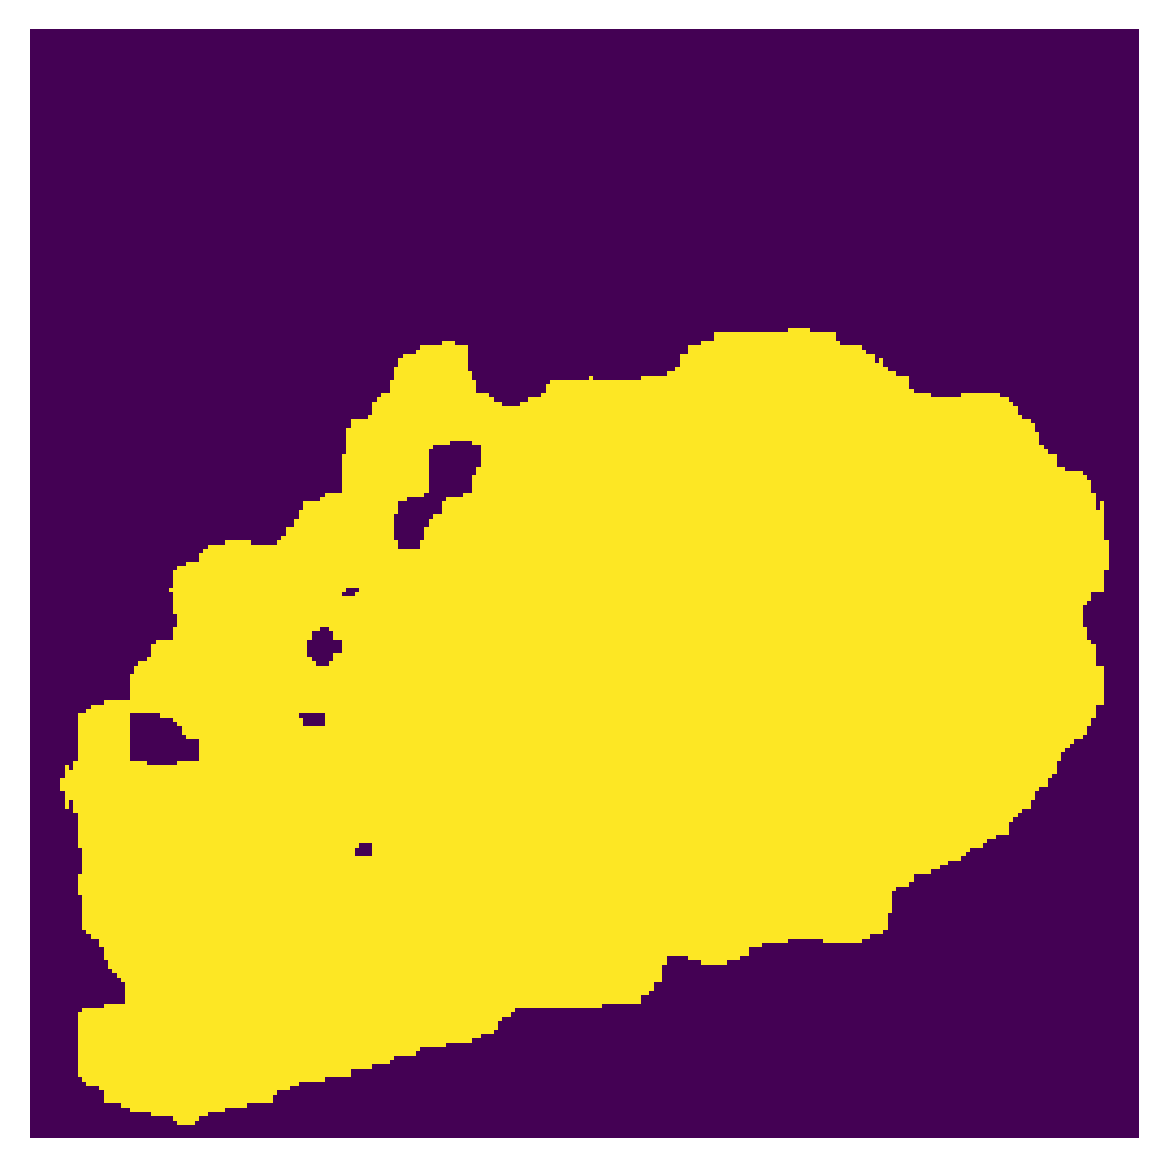

In [ ]:
cell_filtered=(lbls==rp.iloc[0]['label'])
plt.imshow(cell_filtered)
plt.axis("off")

# Extract features for further analysis
## Example of a few morphological features

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

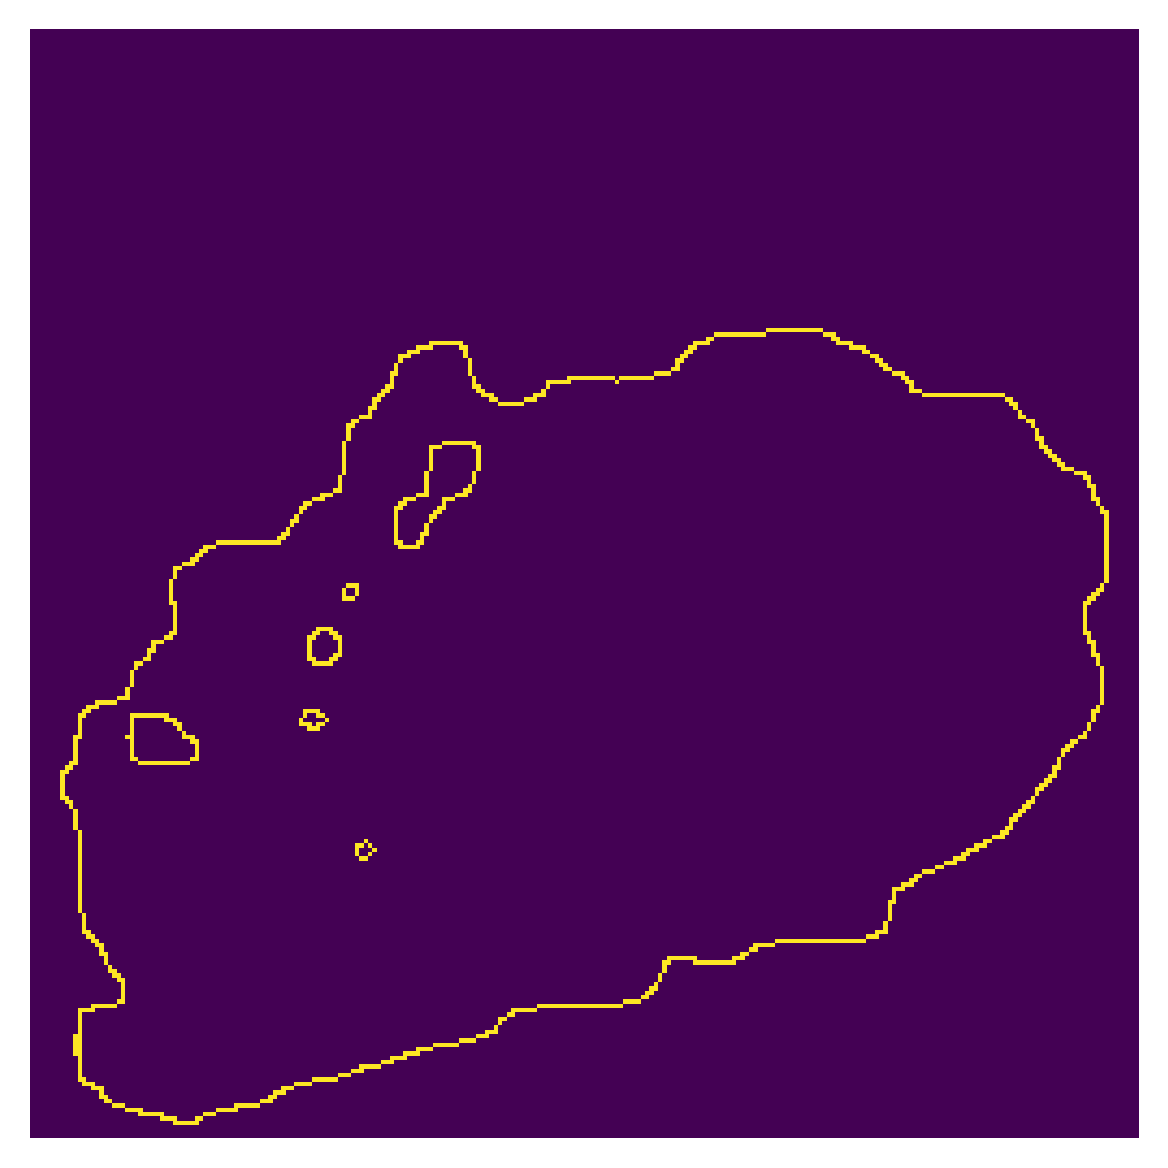

In [ ]:
cell_filtered_canny=canny(lbls==rp.iloc[0]['label'].astype(float))
plt.imshow(cell_filtered_canny)
plt.axis("off")

In [ ]:
PROPERTIES=['area', 'convex_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'feret_diameter_max', 'filled_area', 'major_axis_length',
       'minor_axis_length', 'perimeter', 'solidity']

pd.DataFrame(regionprops_table(cell_filtered.astype(int),properties=PROPERTIES)).T

,0
area,29590.000000
convex_area,32450.000000
eccentricity,0.827524
equivalent_diameter,194.100897
extent,0.664526
feret_diameter_max,271.516114
filled_area,30055.000000
major_axis_length,263.841664
minor_axis_length,148.128585
perimeter,1025.009235
